# Enter Student Name & ID

In [1]:
student_id =   99101643#@param {type:"integer"}
student_name = "SaraR ezanezhad" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99101643
your name: SaraR ezanezhad


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [5]:
import numpy as np

In [2]:
def myPCA(X, num_components):
    X_centered = X - np.mean(X, axis=0)

    cov_matrix = np.cov(X_centered, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    reduced_data = np.dot(X_centered, selected_eigenvectors)

    return reduced_data


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [3]:
import matplotlib as plt
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

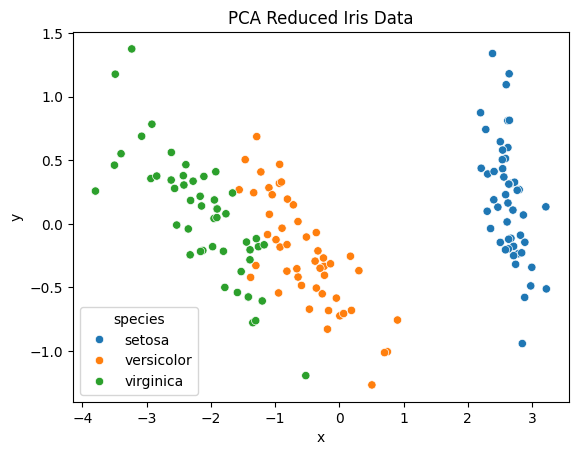

In [6]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Use your myPCA function with 2 components
num_components = 2
reduced_data = myPCA(X, num_components)

# Create a DataFrame for the reduced data
iris_2d = pd.DataFrame(reduced_data, columns=['x', 'y'])
iris_2d['species'] = iris.target_names[y]

# Scatter plot
sns.scatterplot(x='x', y='y', data=iris_2d, hue='species')
plt.title("PCA Reduced Iris Data")
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `


### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

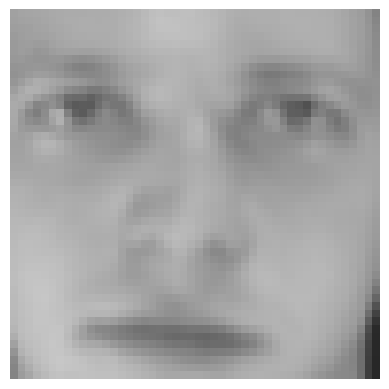

1


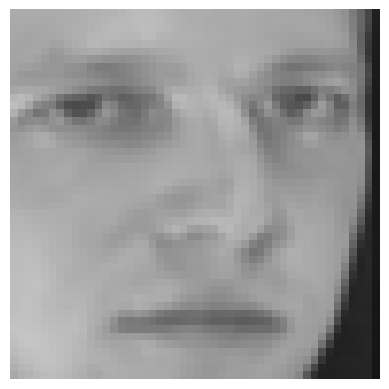

1


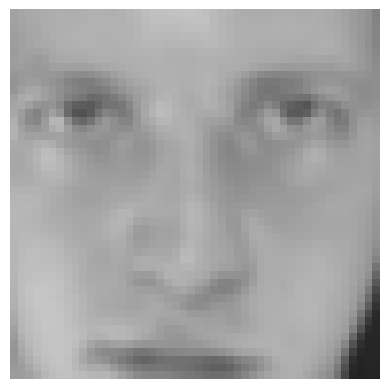

1


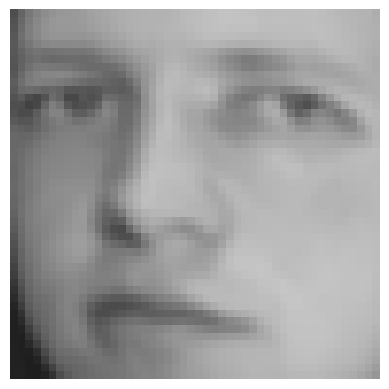

1


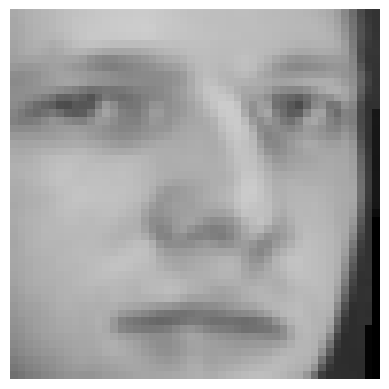

1


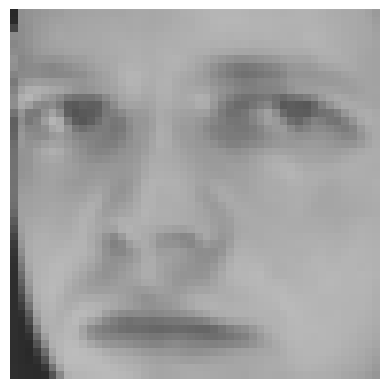

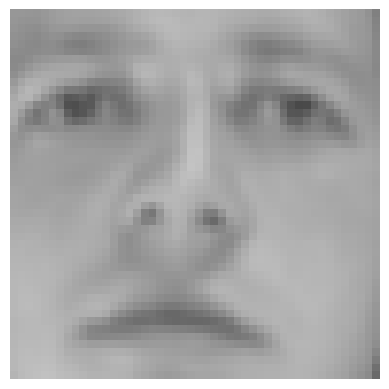

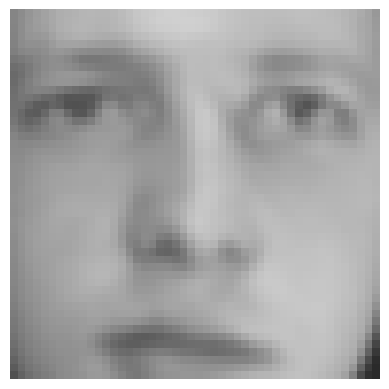

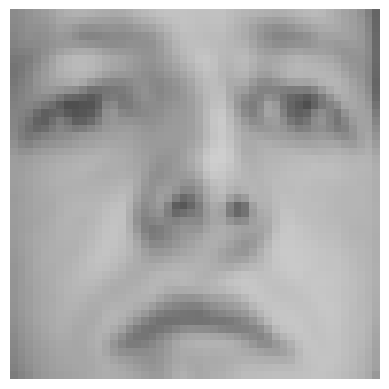

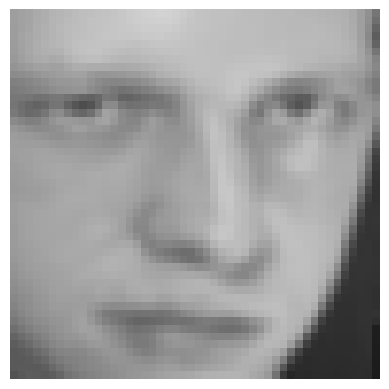

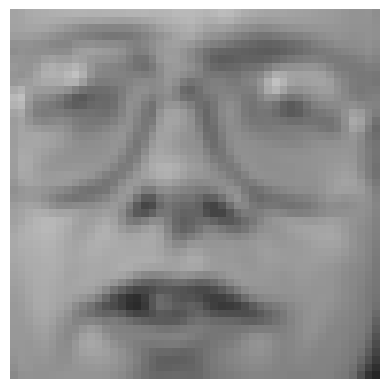

1


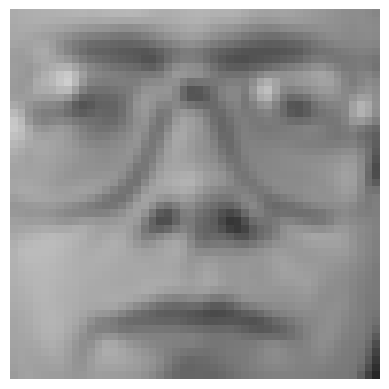

1


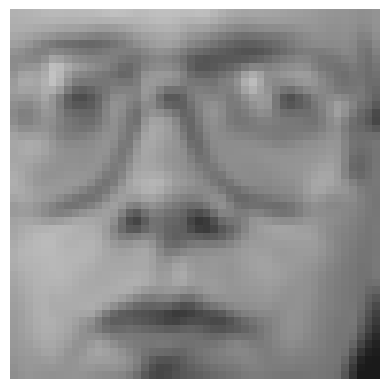

1


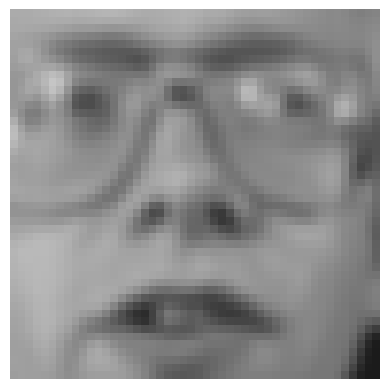

1


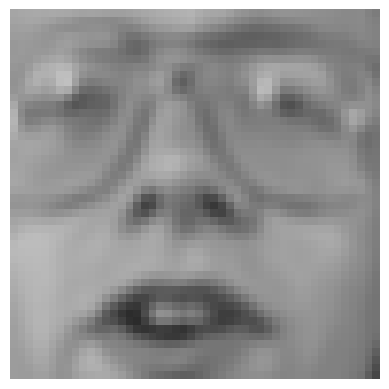

1


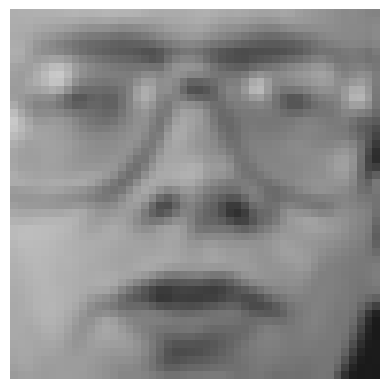

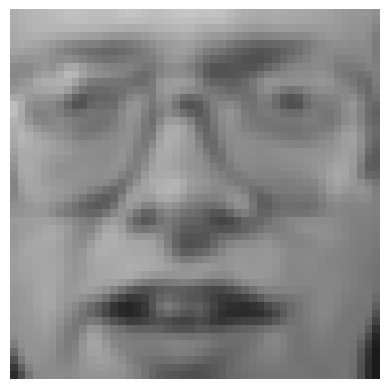

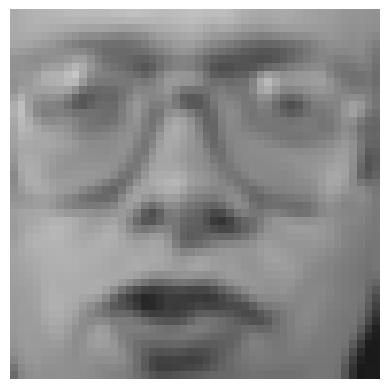

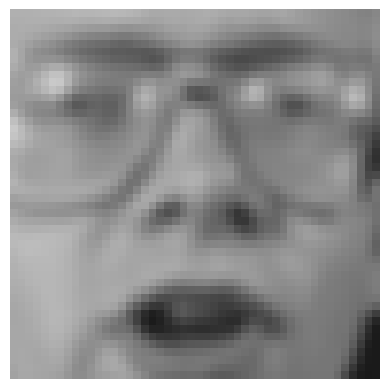

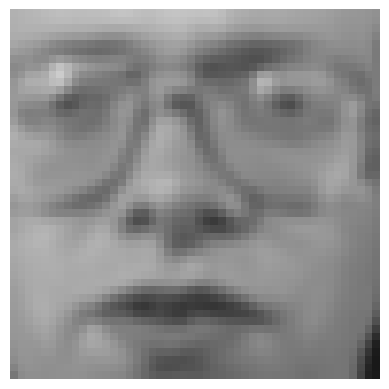

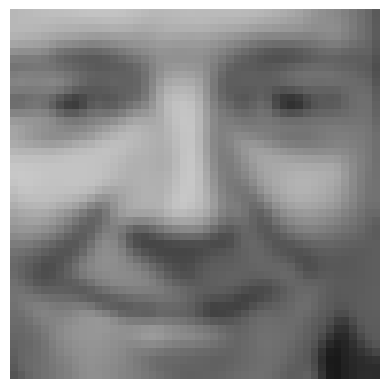

1


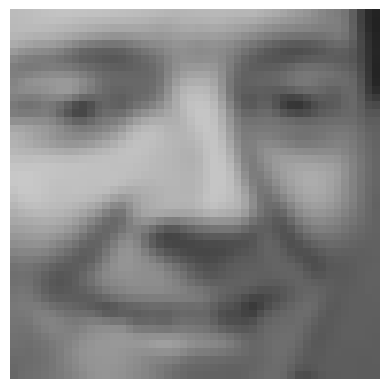

1


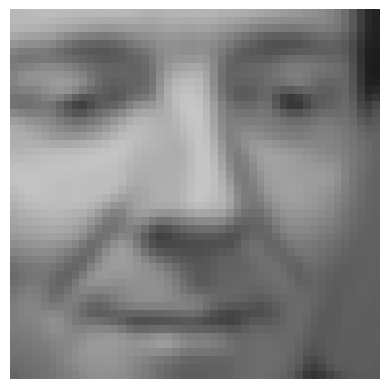

1


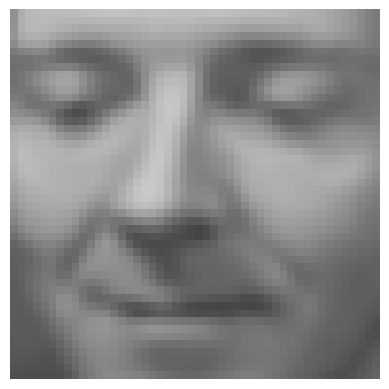

1


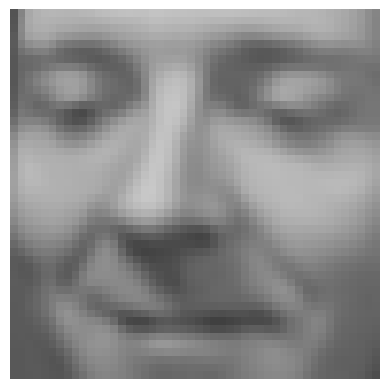

1


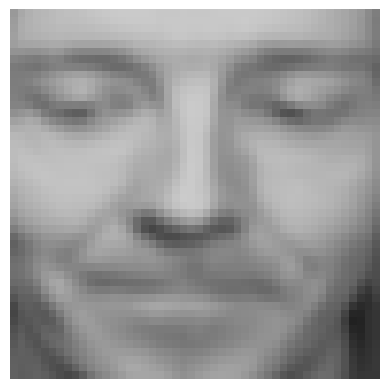

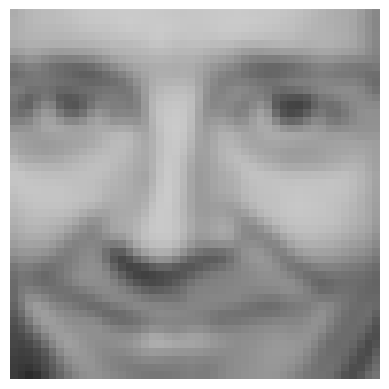

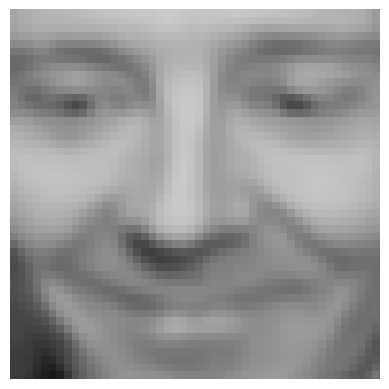

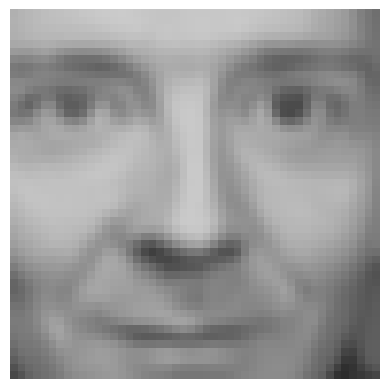

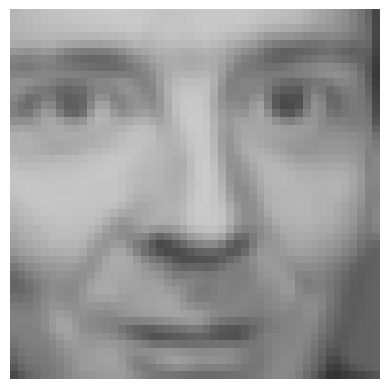

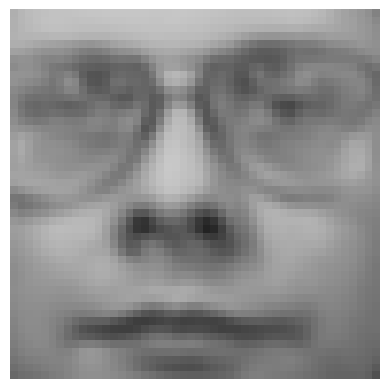

1


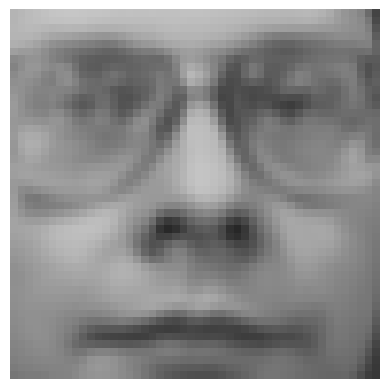

1


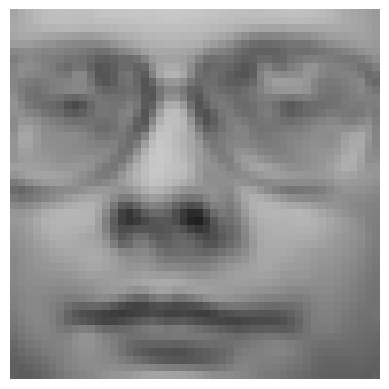

1


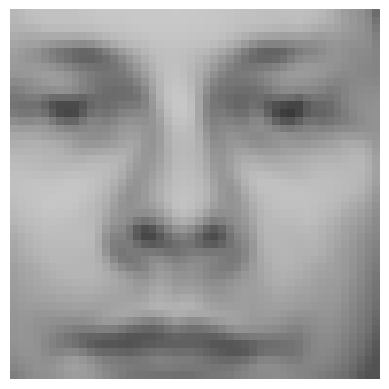

1


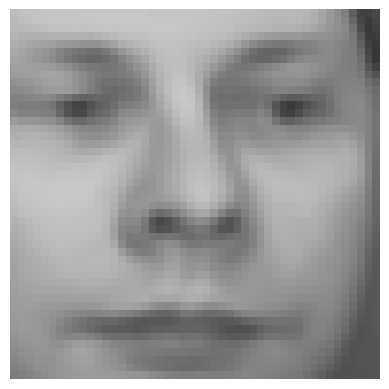

1


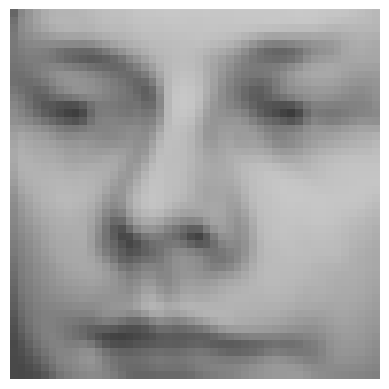

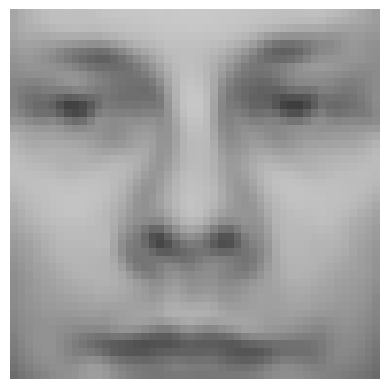

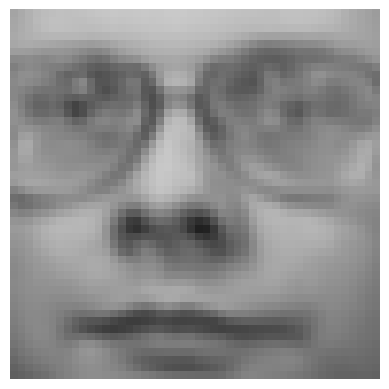

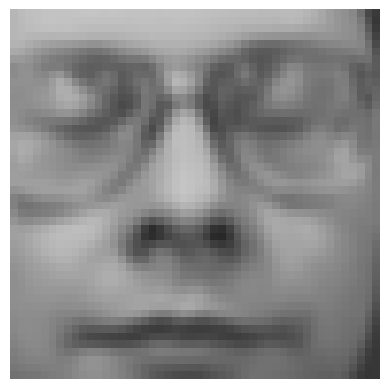

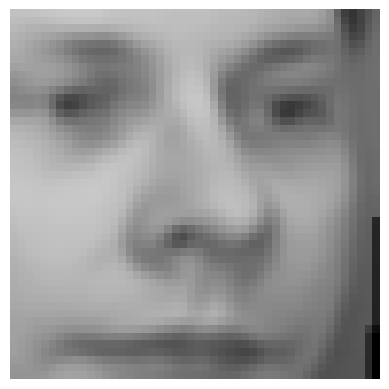

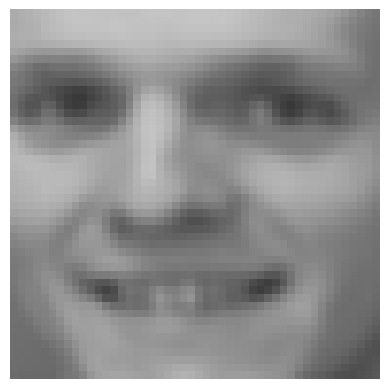

1


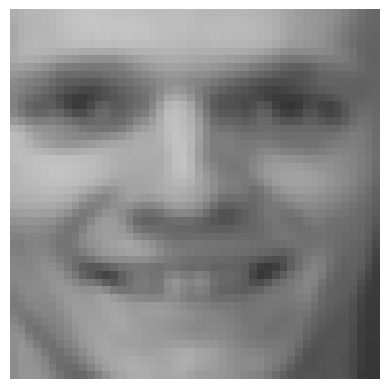

1


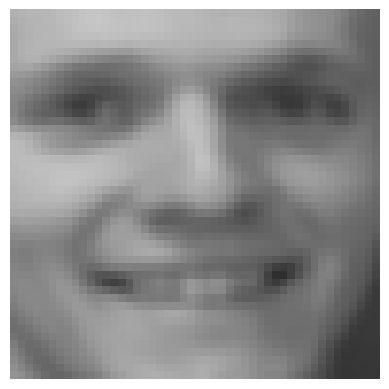

1


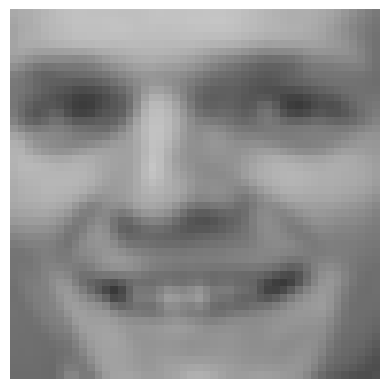

1


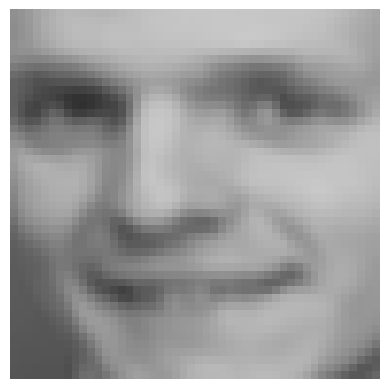

1


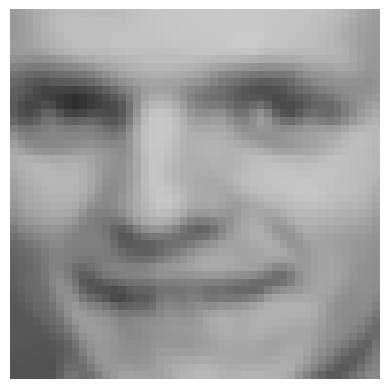

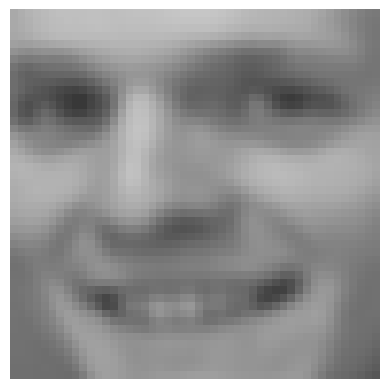

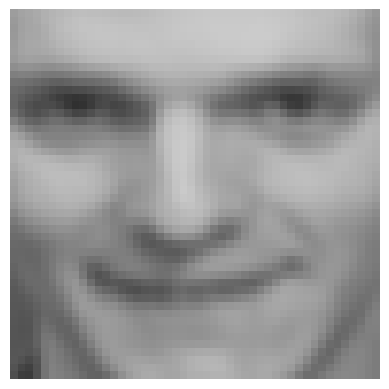

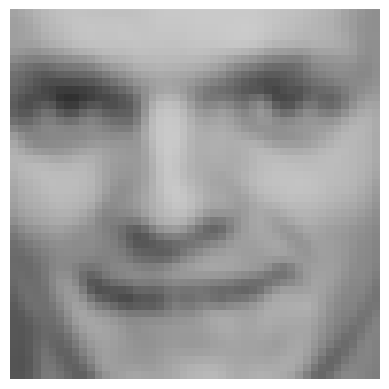

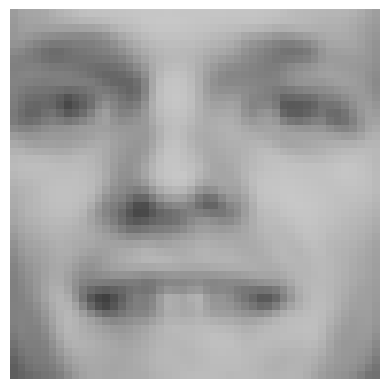

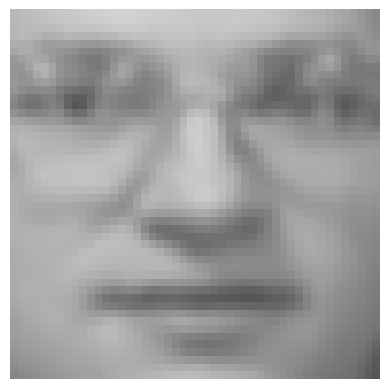

1


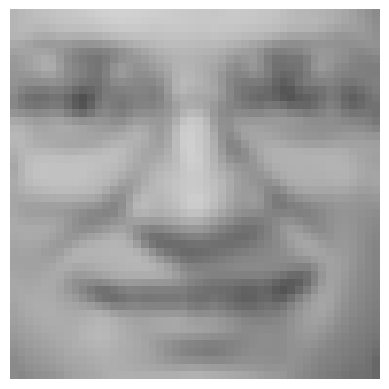

1


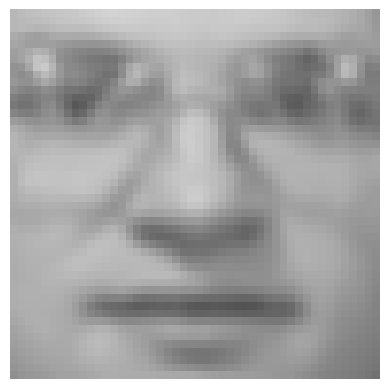

1


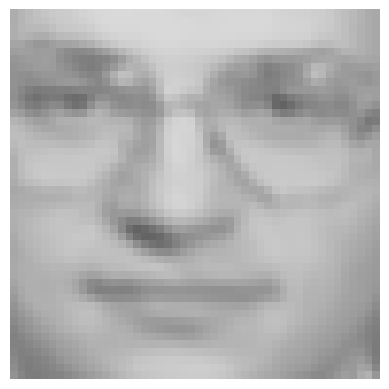

1


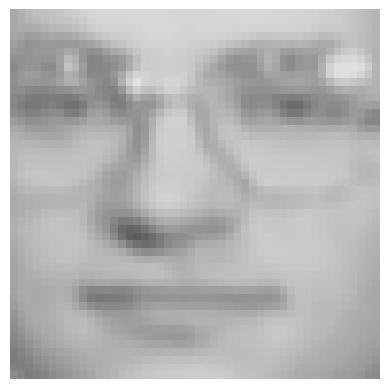

1


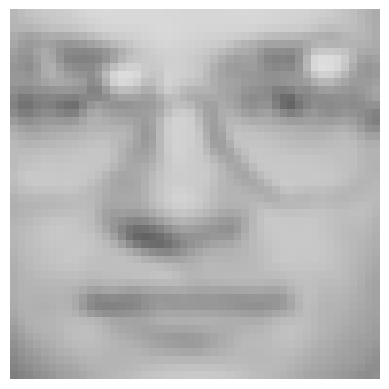

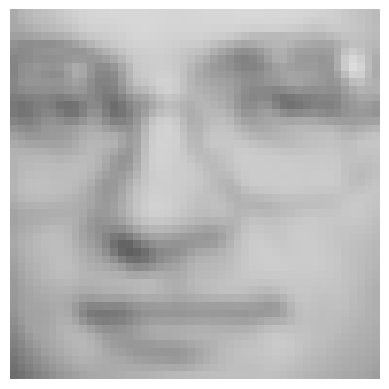

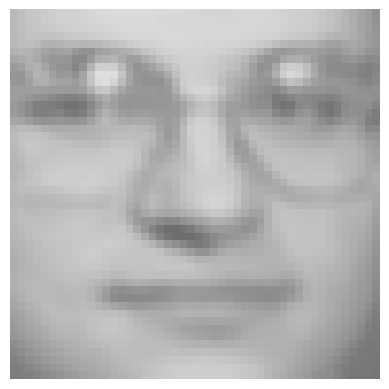

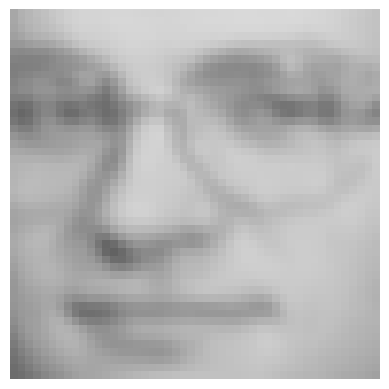

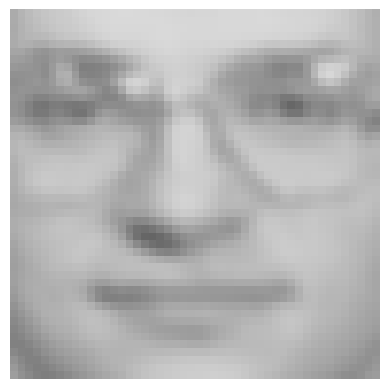

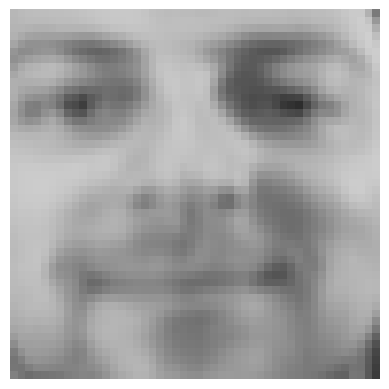

1


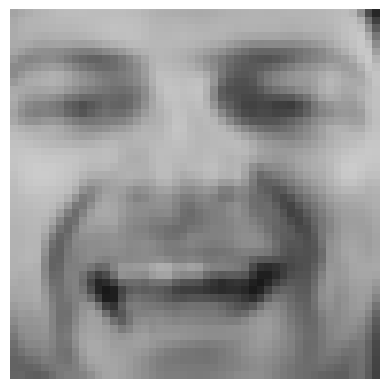

1


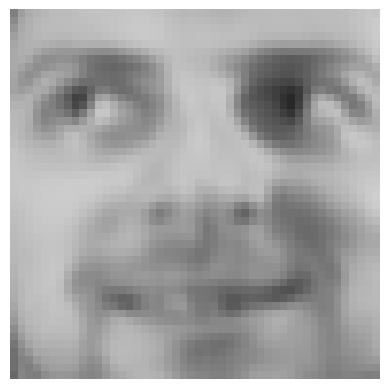

1


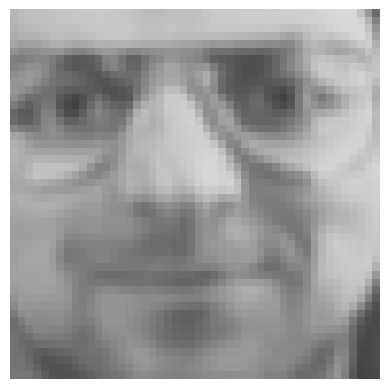

1


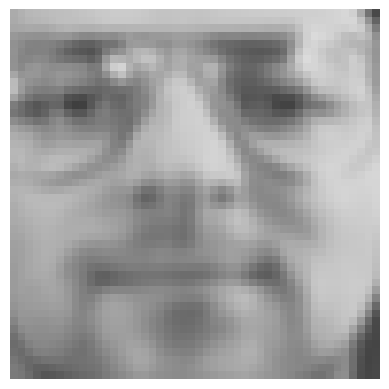

1


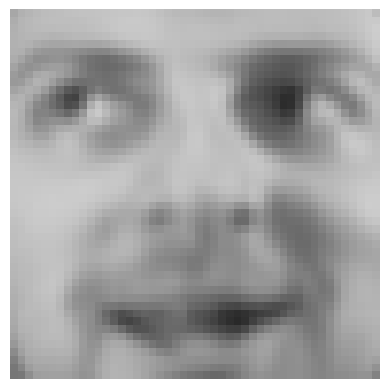

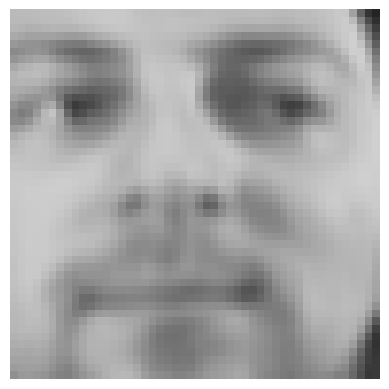

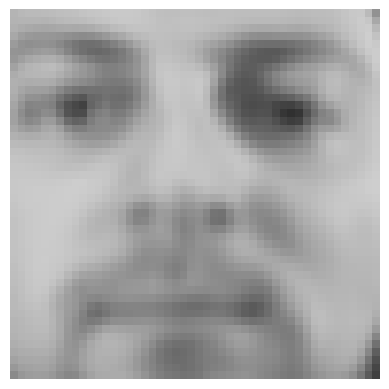

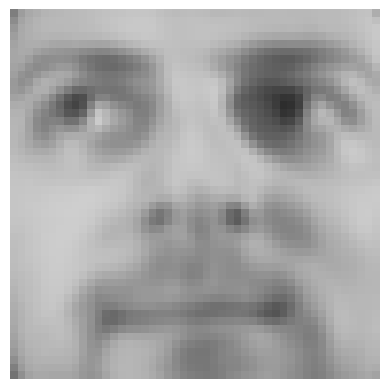

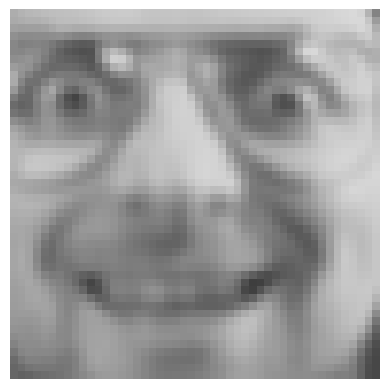

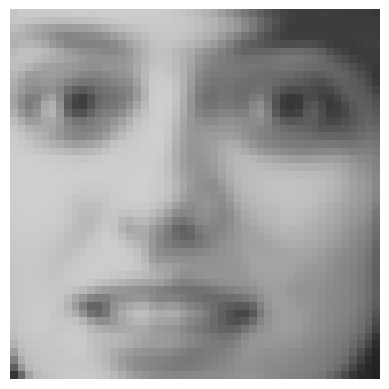

1


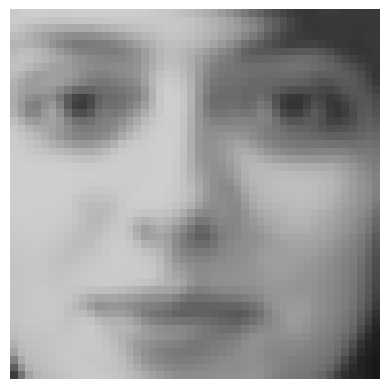

1


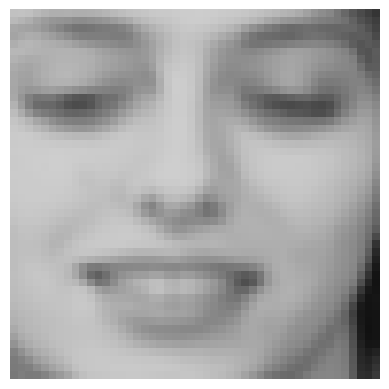

1


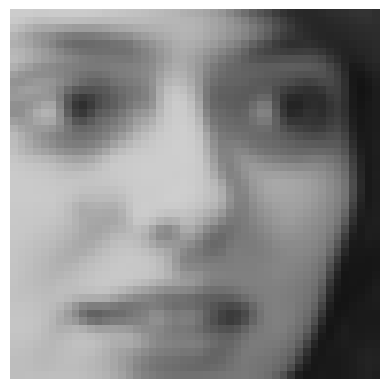

1


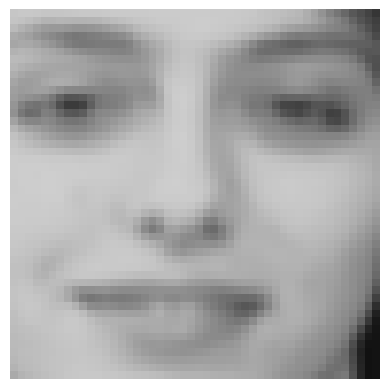

1


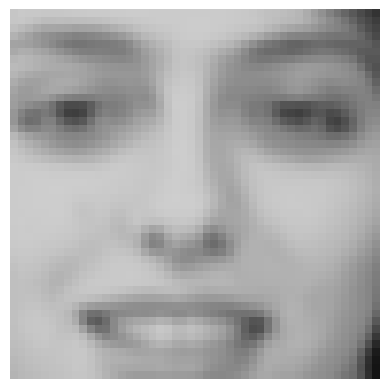

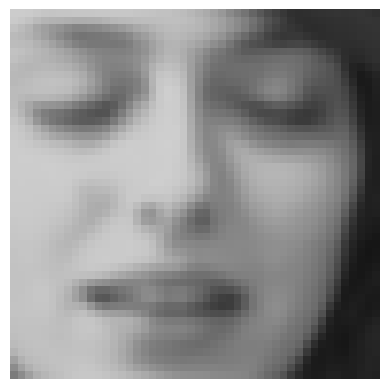

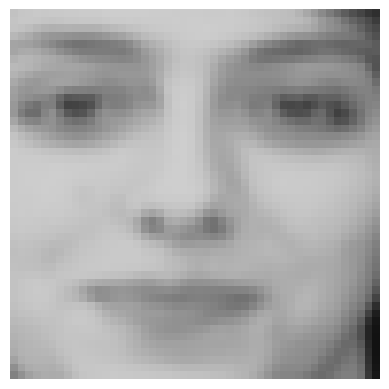

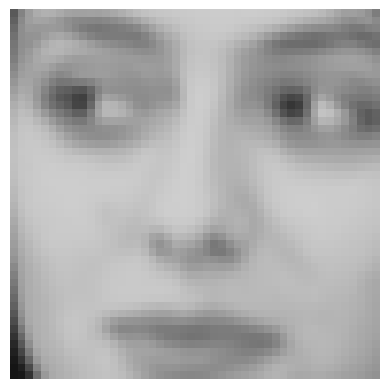

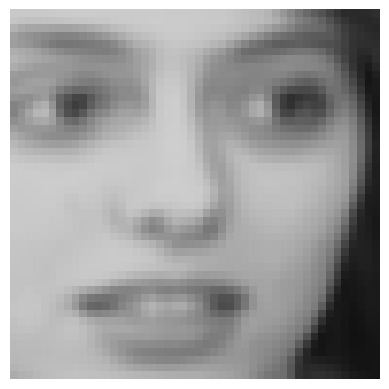

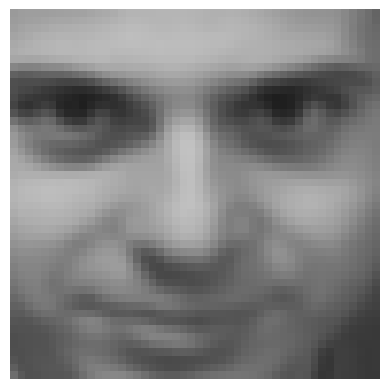

1


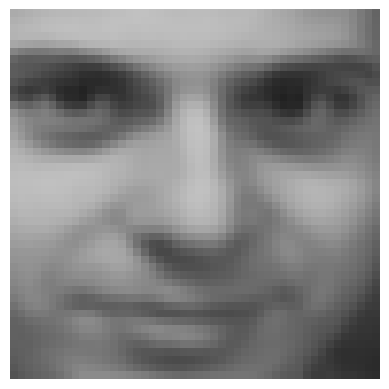

1


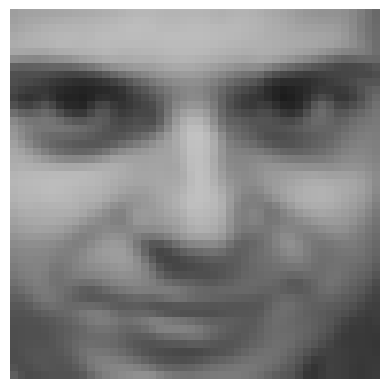

1


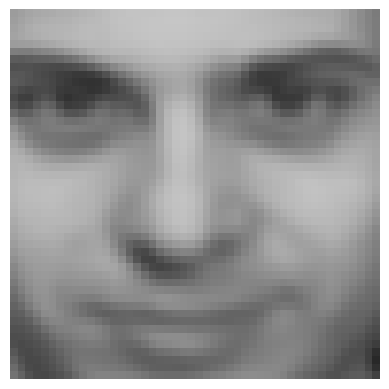

1


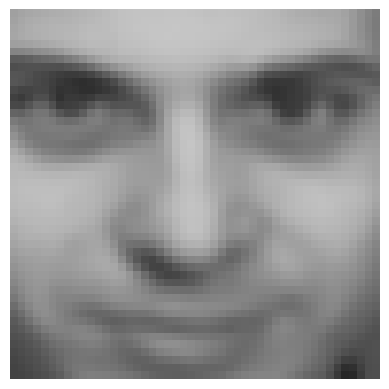

1


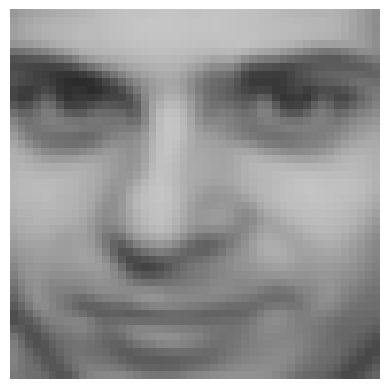

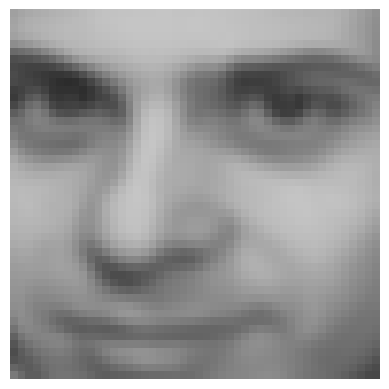

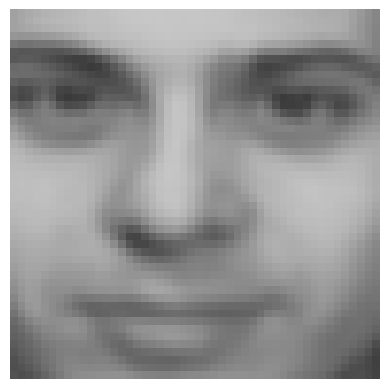

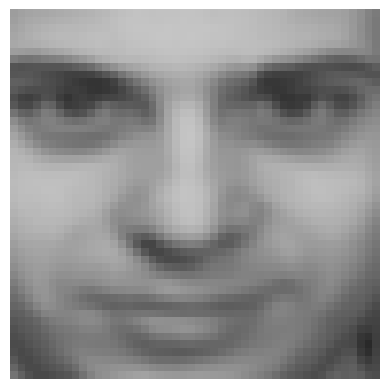

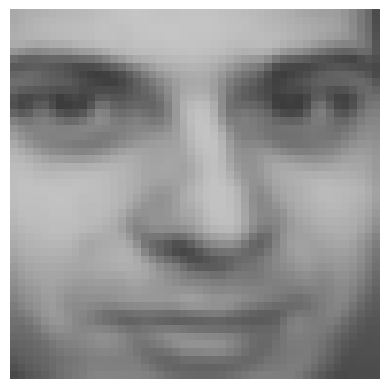

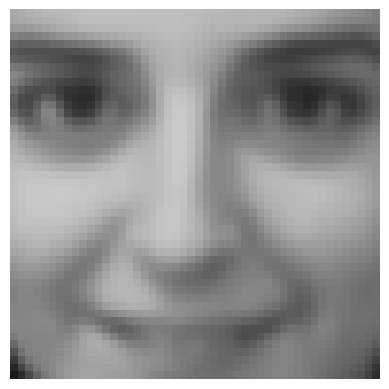

1


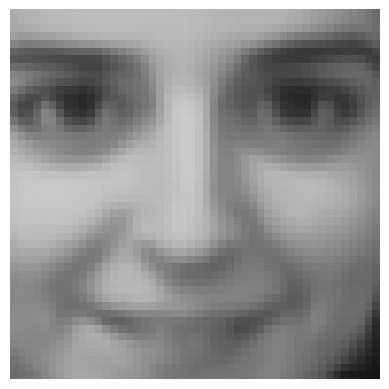

1


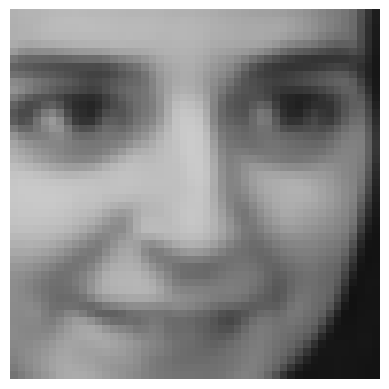

1


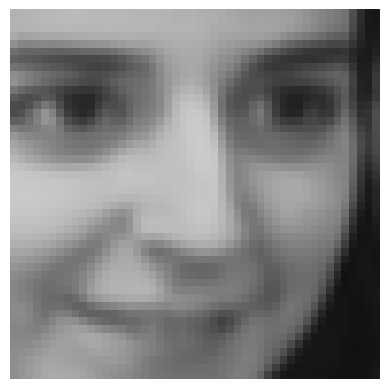

1


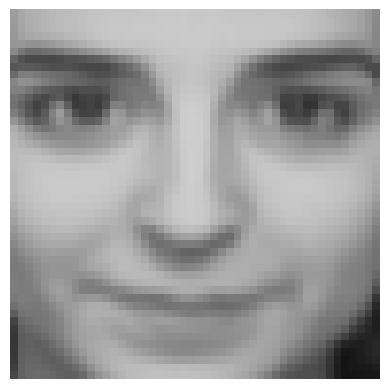

1


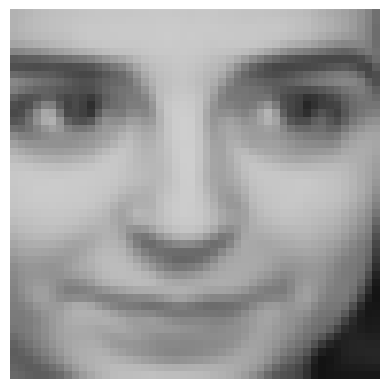

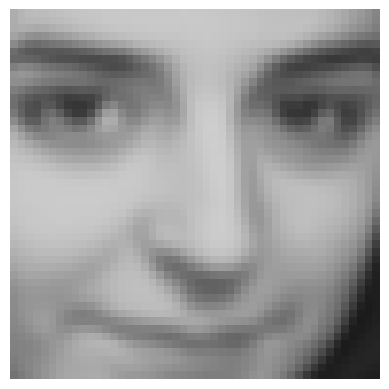

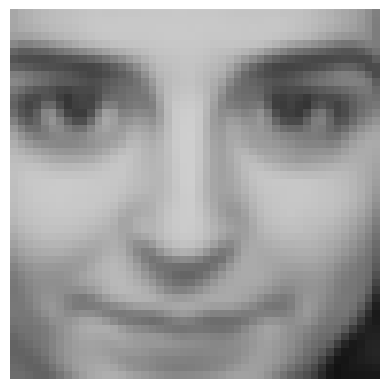

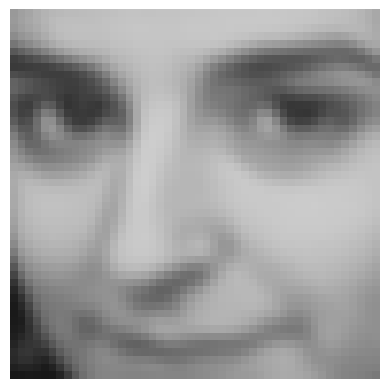

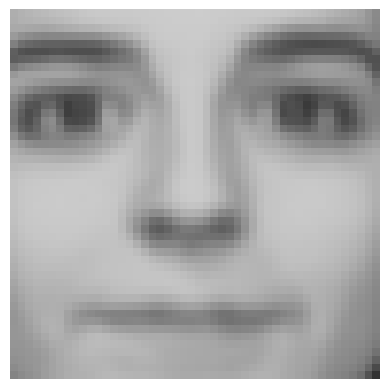

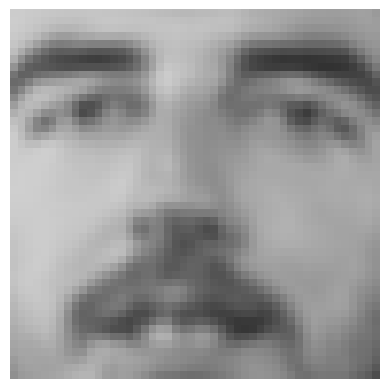

1


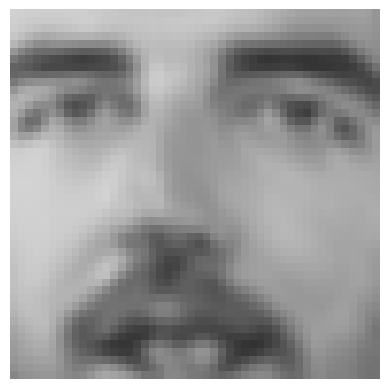

1


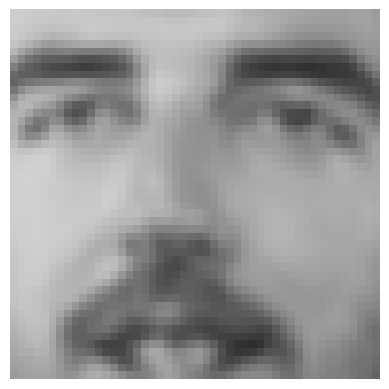

1


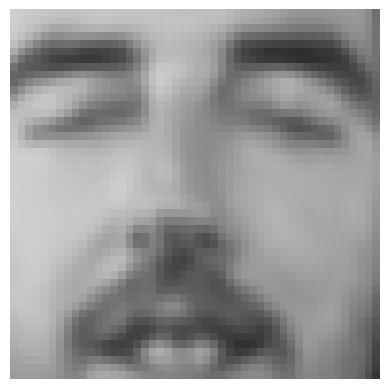

1


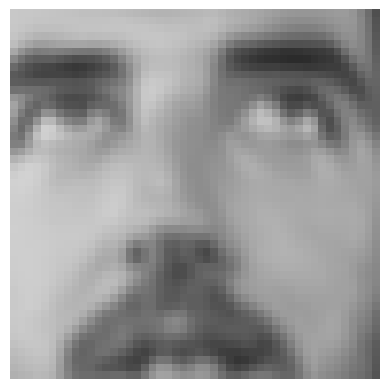

1


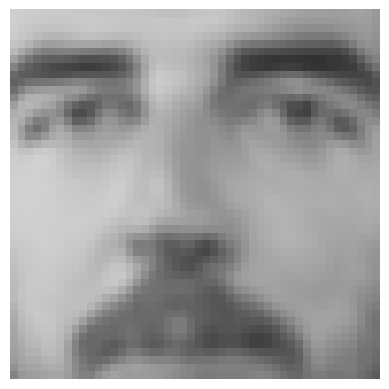

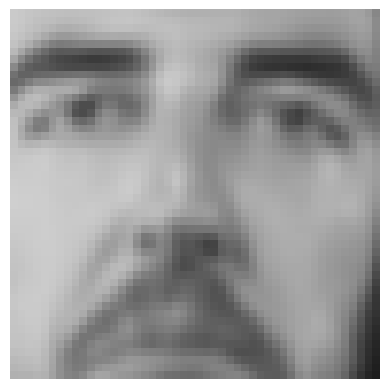

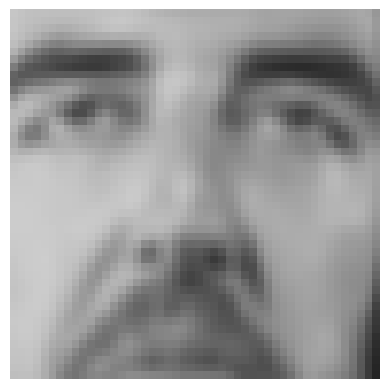

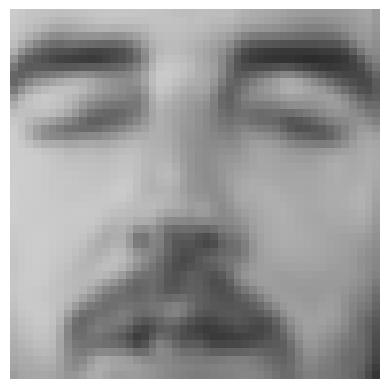

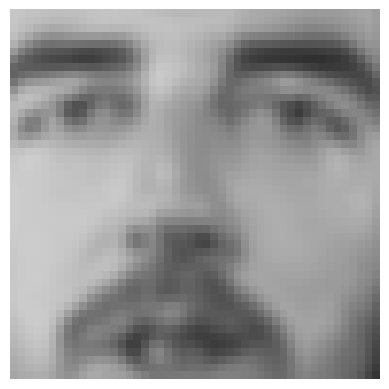

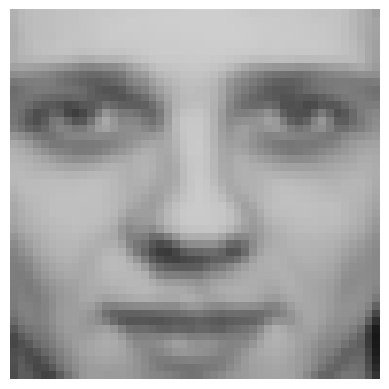

1


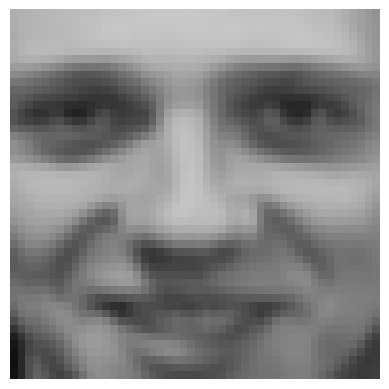

1


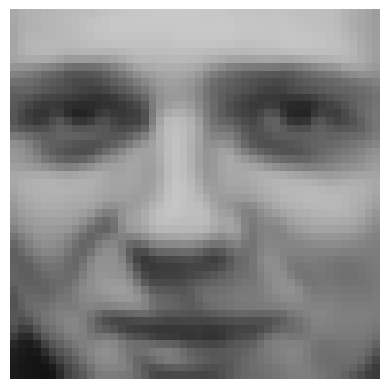

1


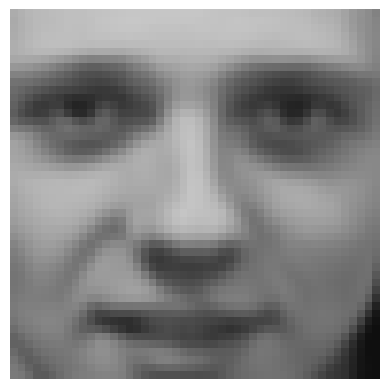

1


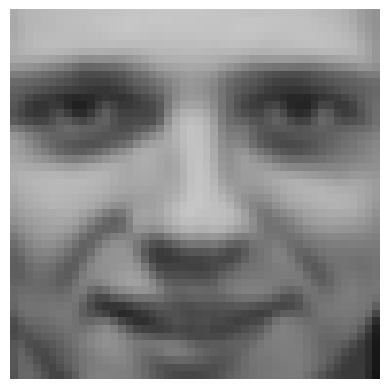

1


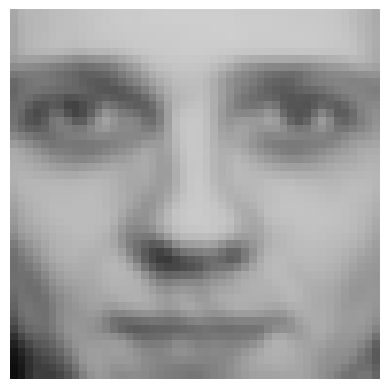

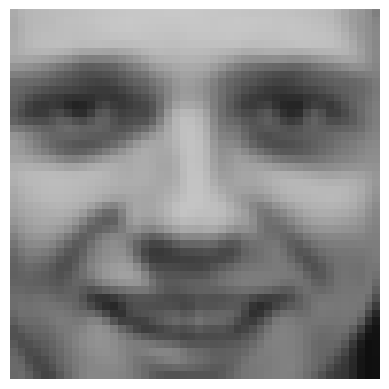

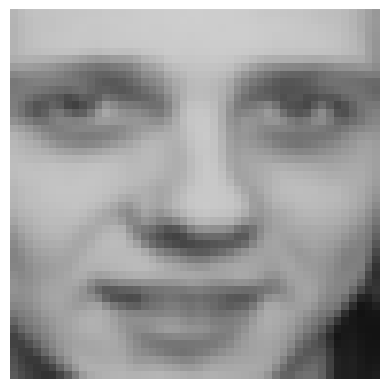

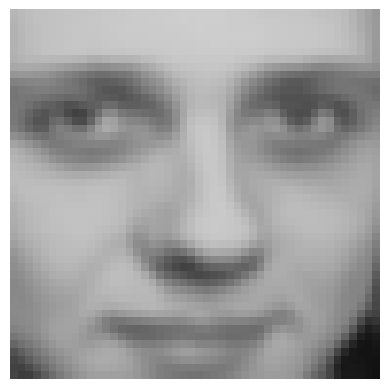

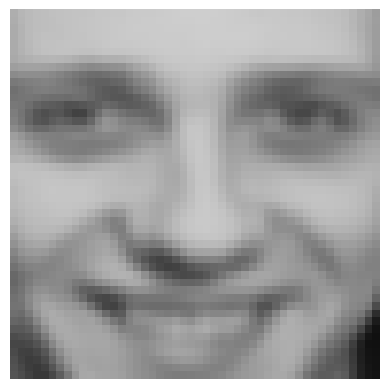

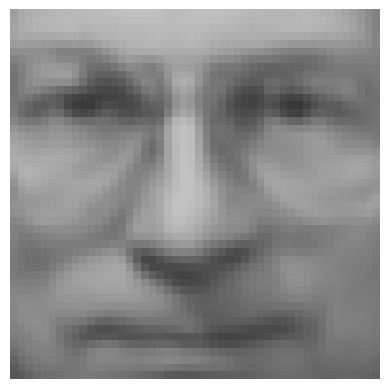

1


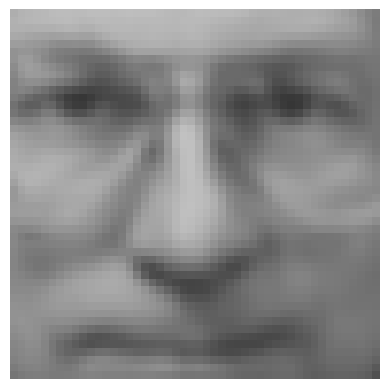

1


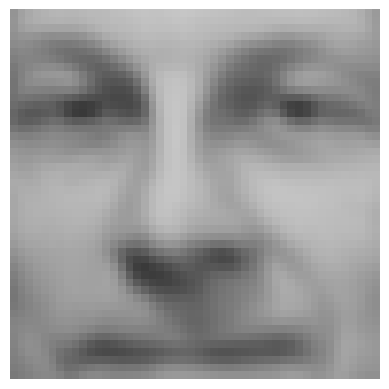

1


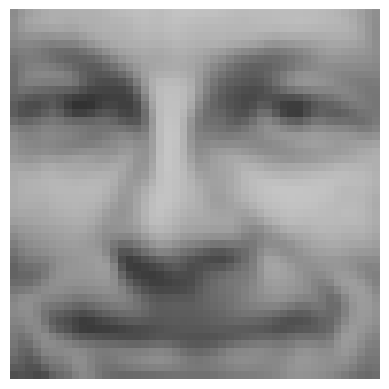

1


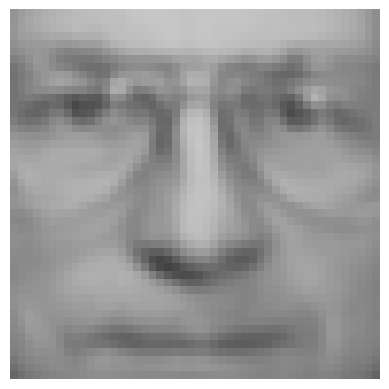

1


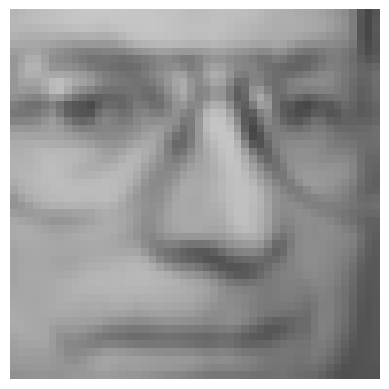

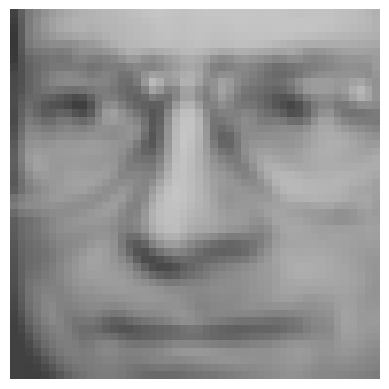

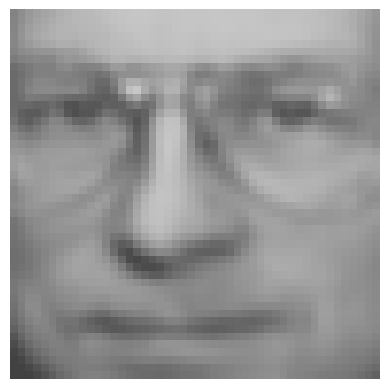

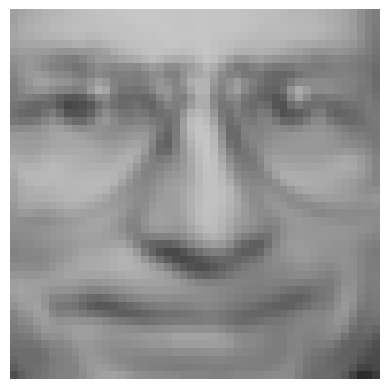

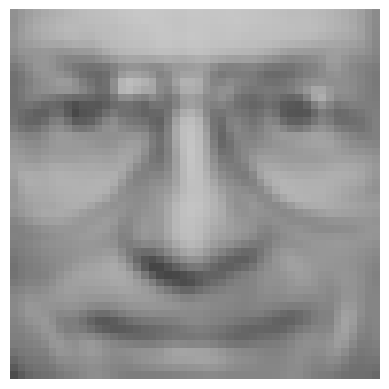

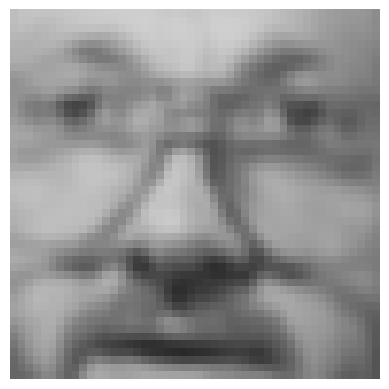

1


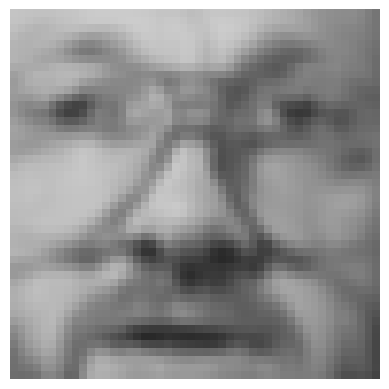

1


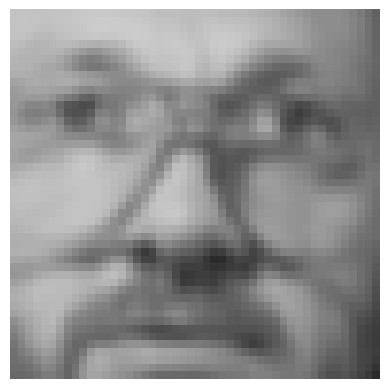

1


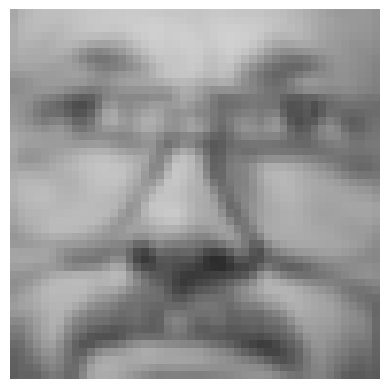

1


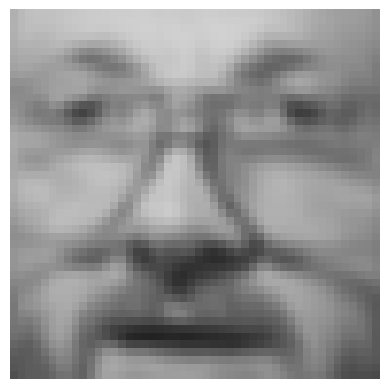

1


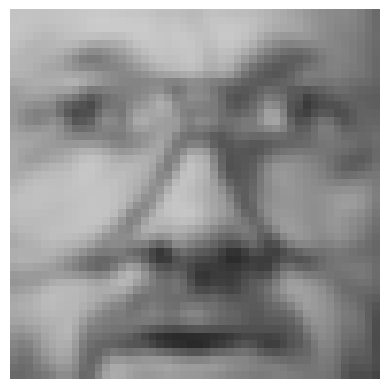

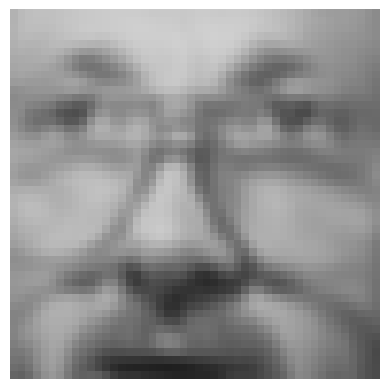

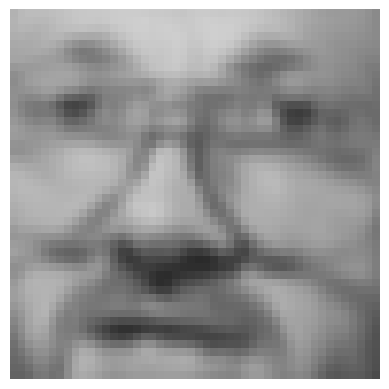

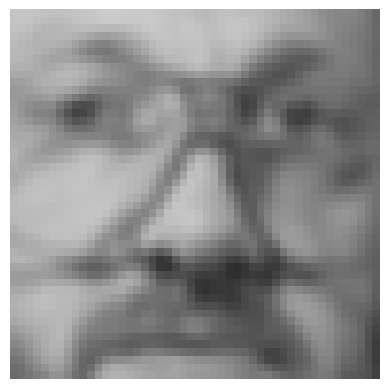

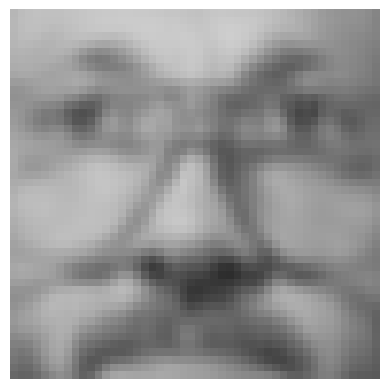

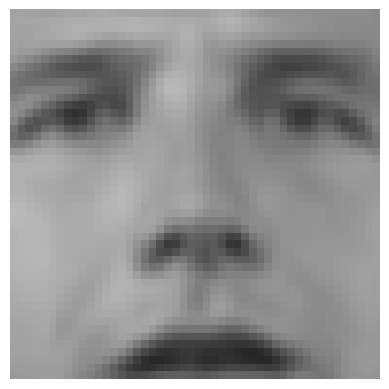

1


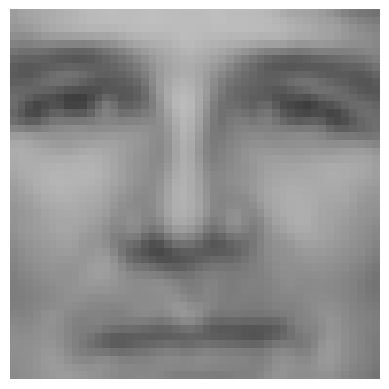

1


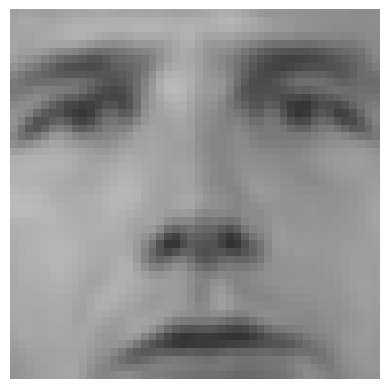

1


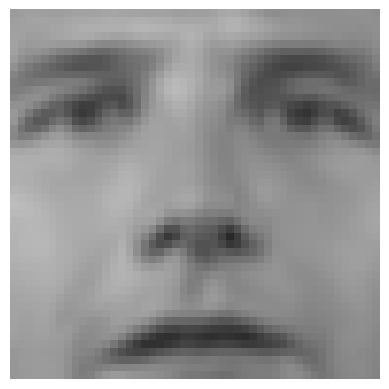

1


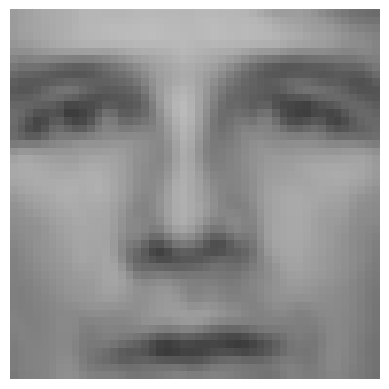

1


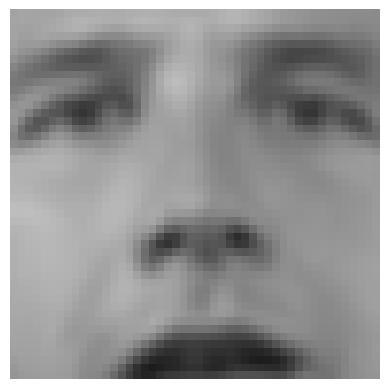

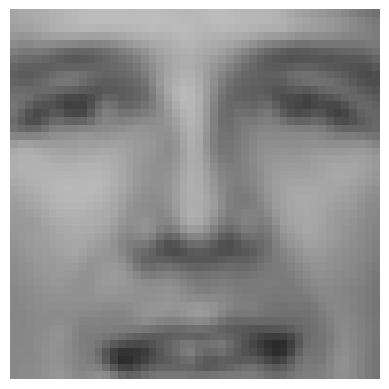

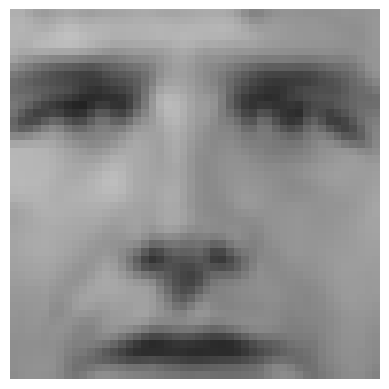

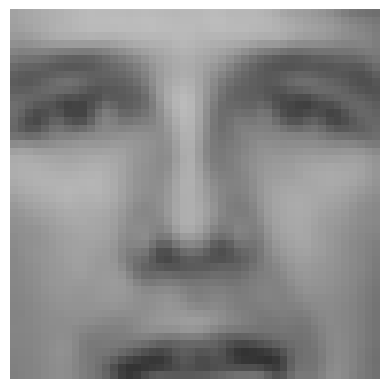

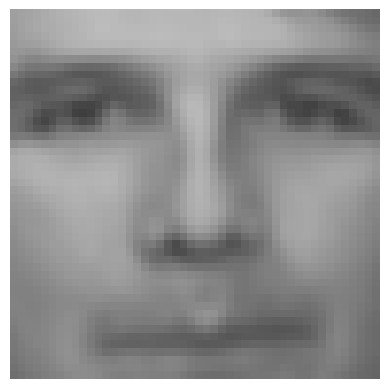

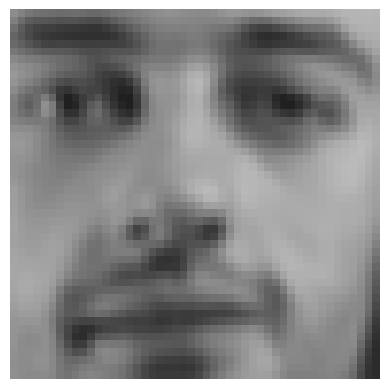

1


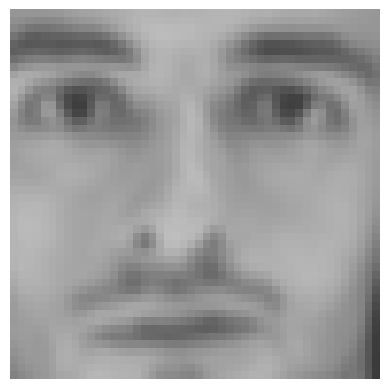

1


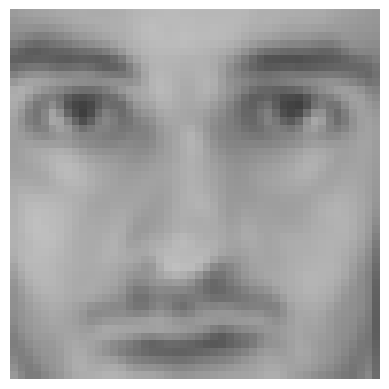

1


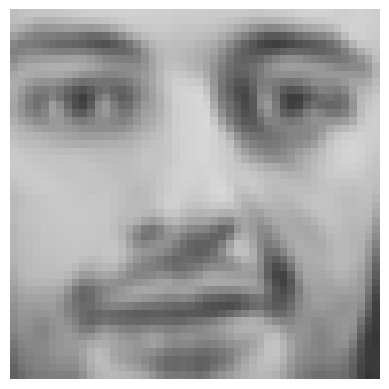

1


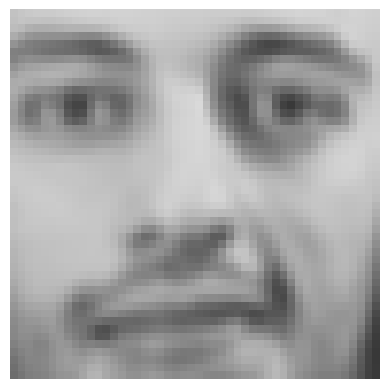

1


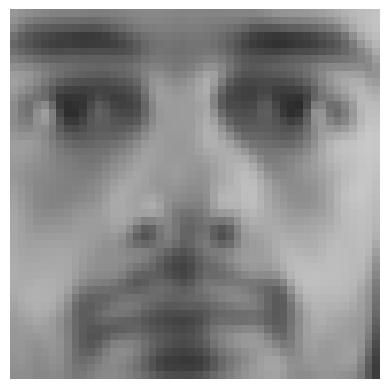

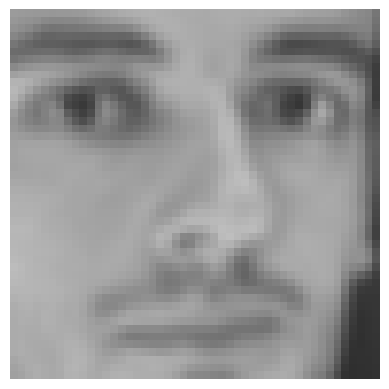

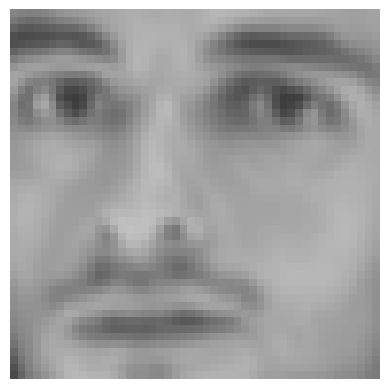

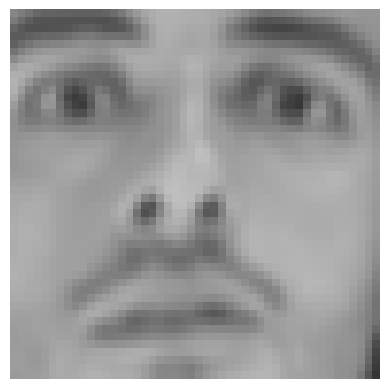

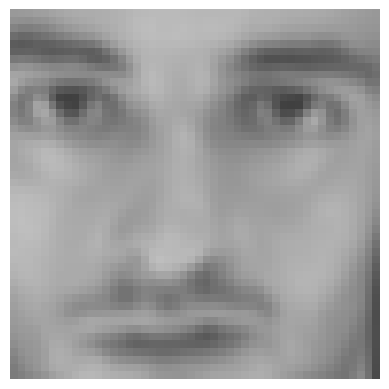

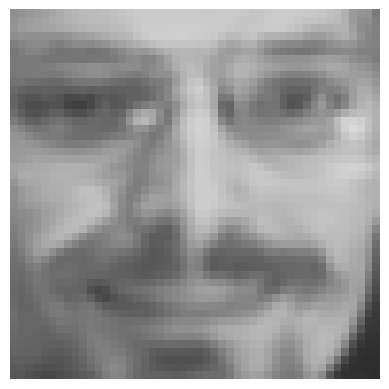

1


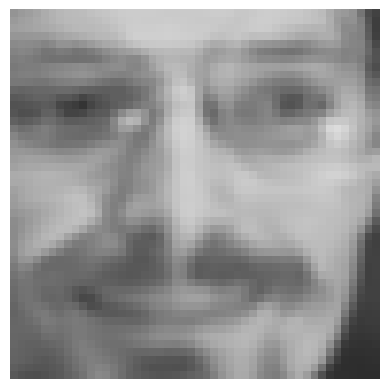

1


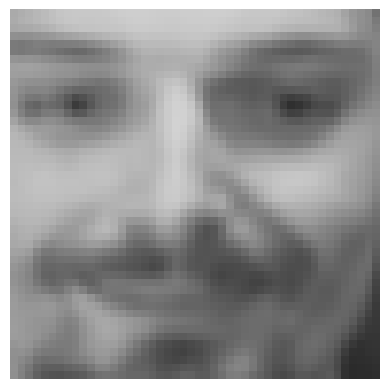

1


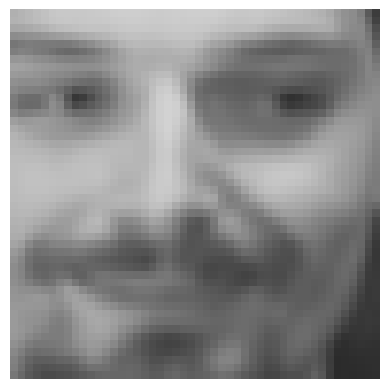

1


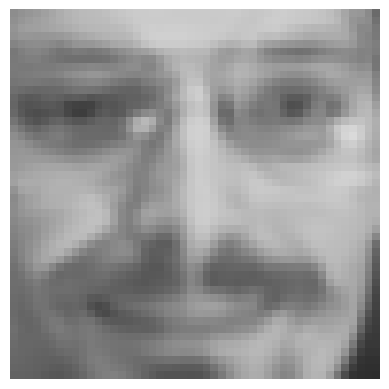

1


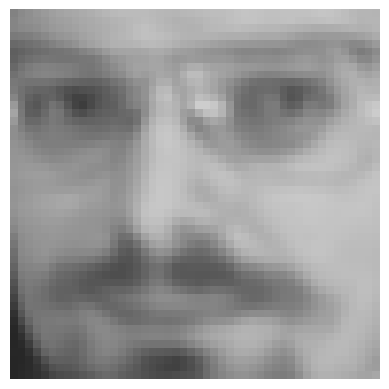

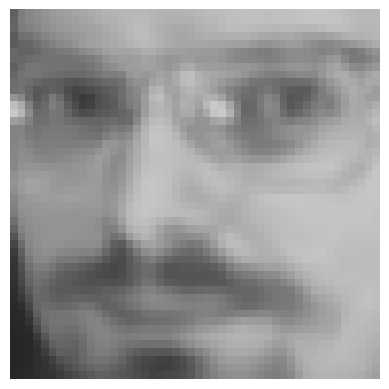

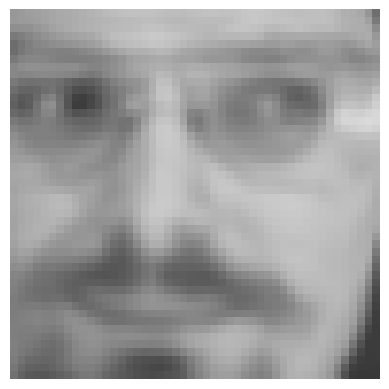

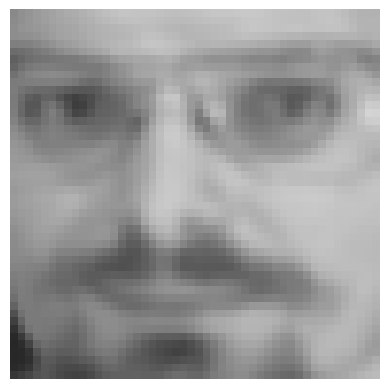

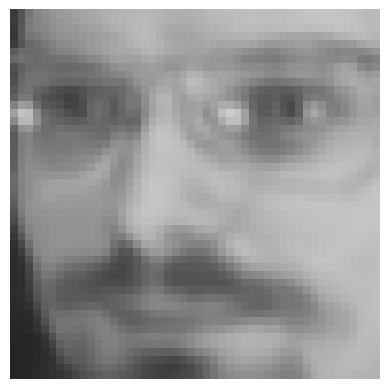

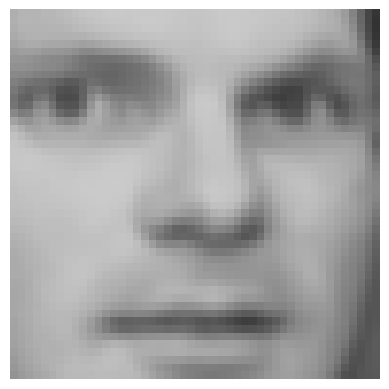

1


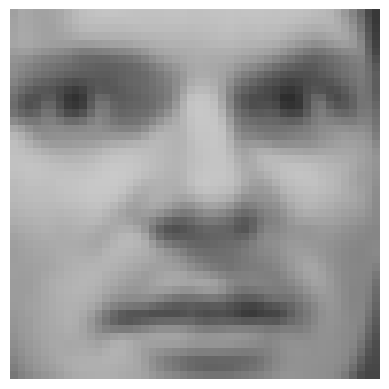

1


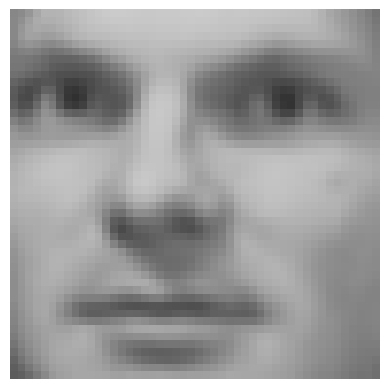

1


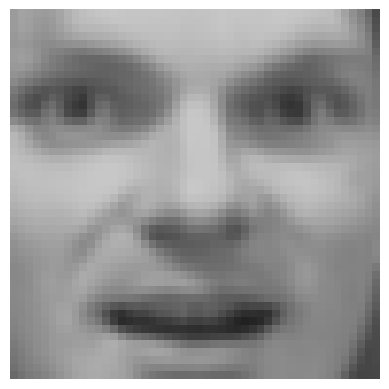

1


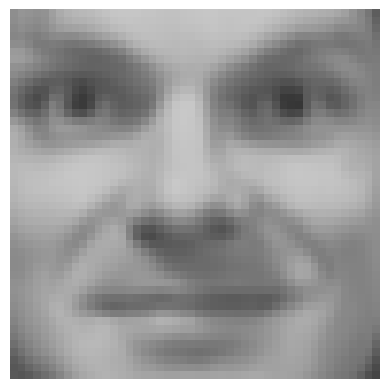

1


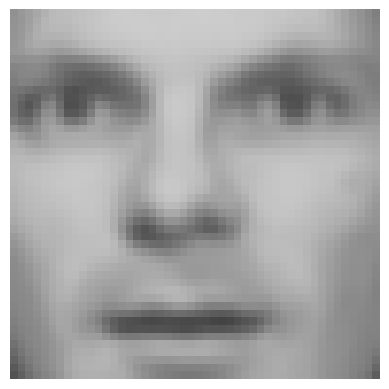

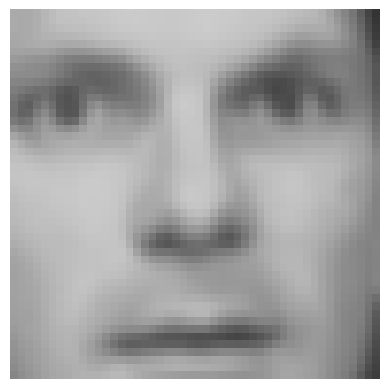

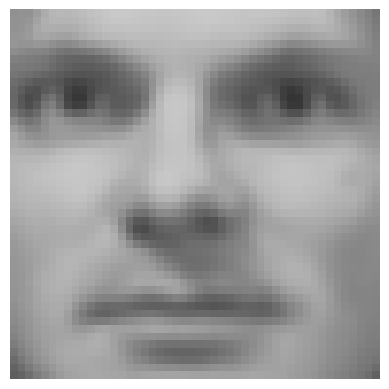

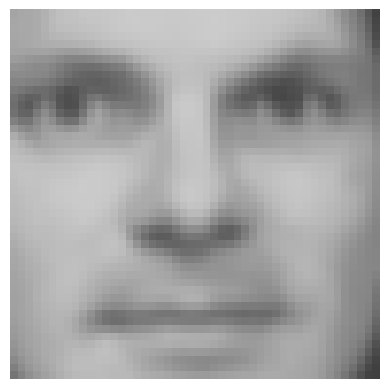

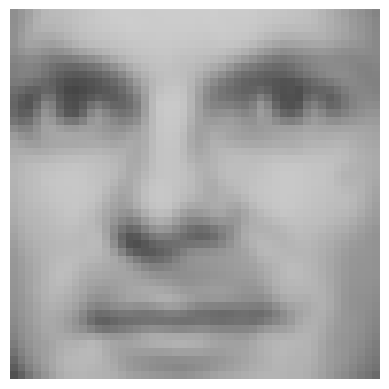

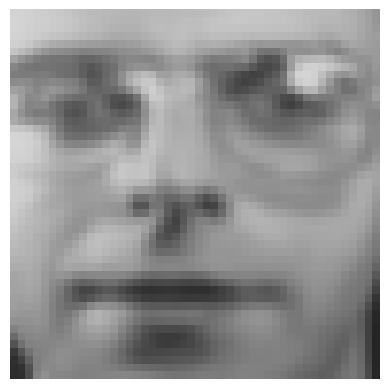

1


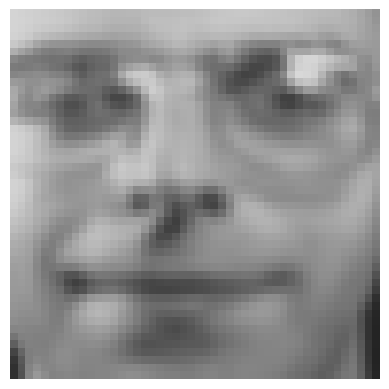

1


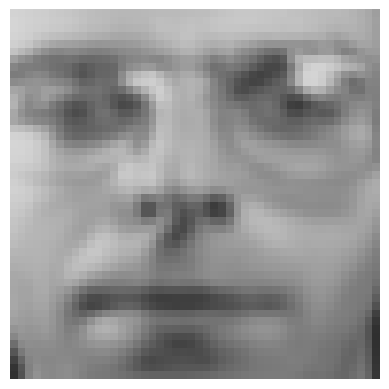

1


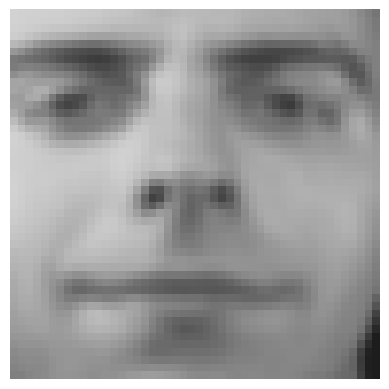

1


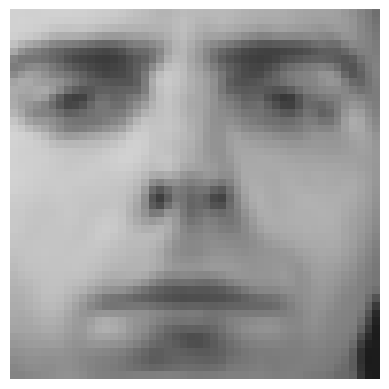

1


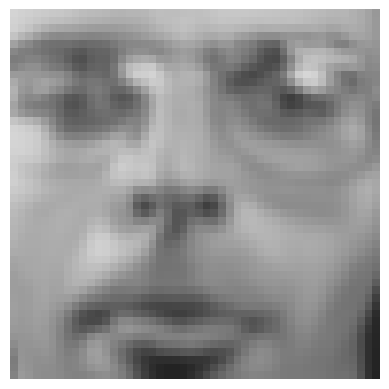

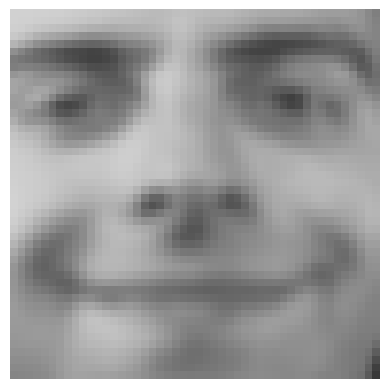

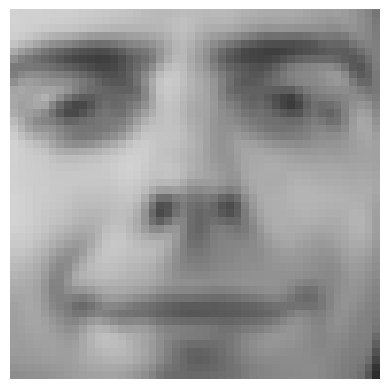

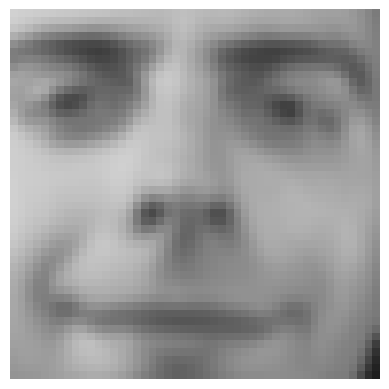

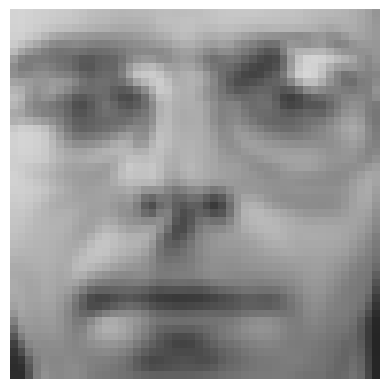

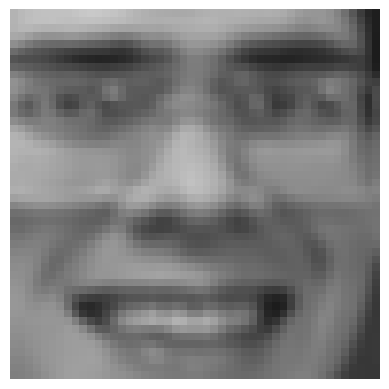

1


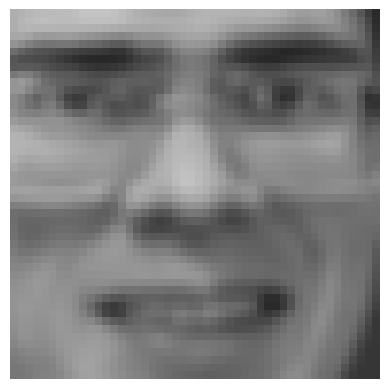

1


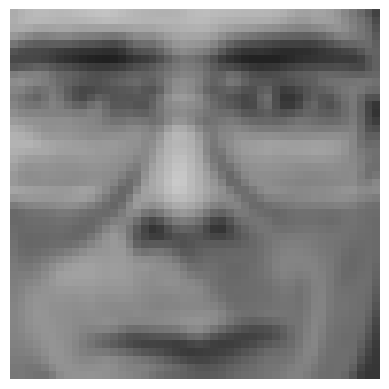

1


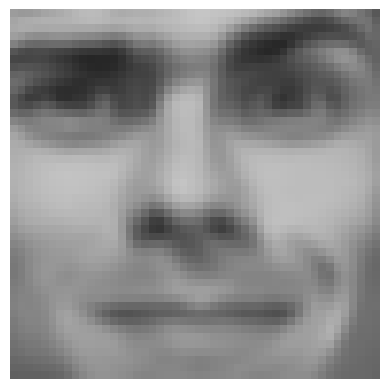

1


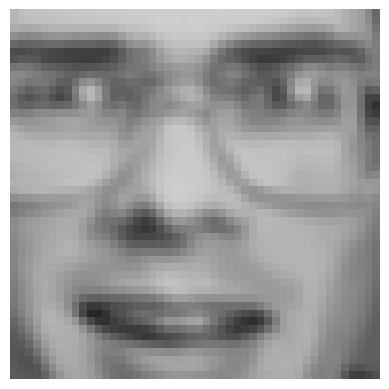

1


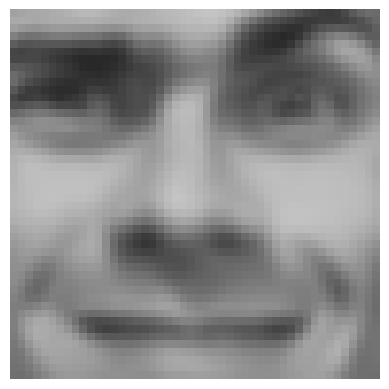

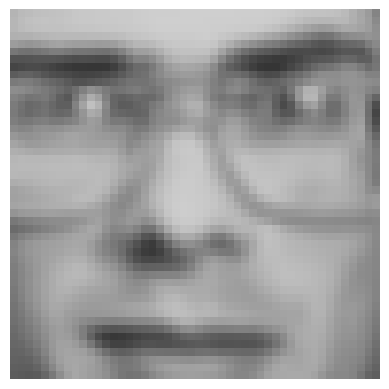

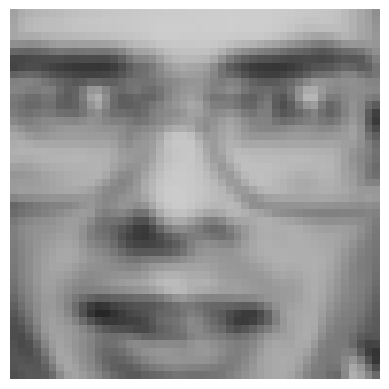

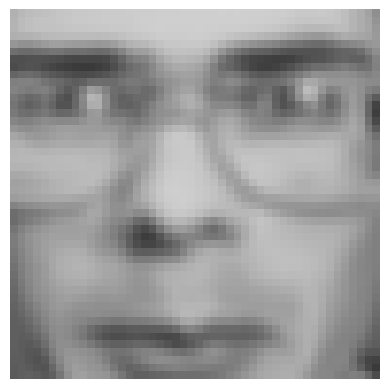

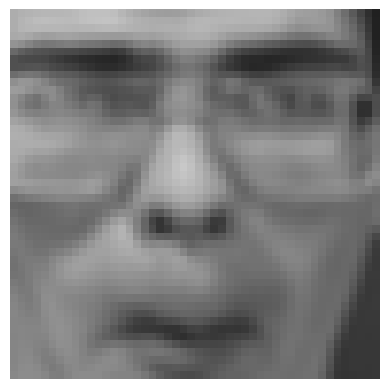

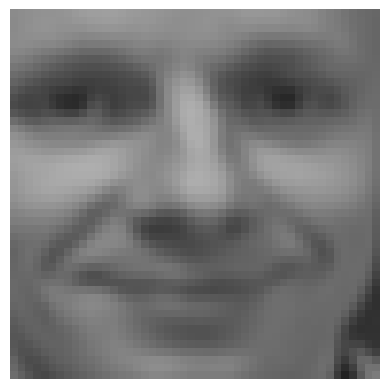

1


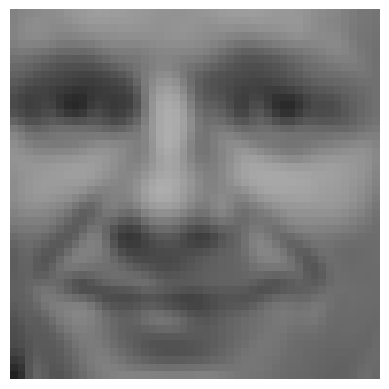

1


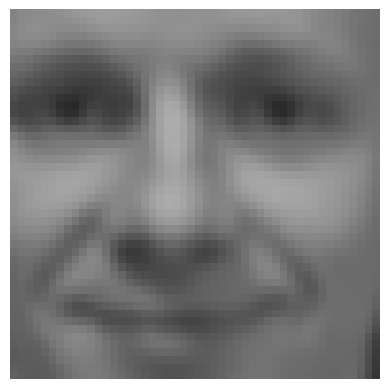

1


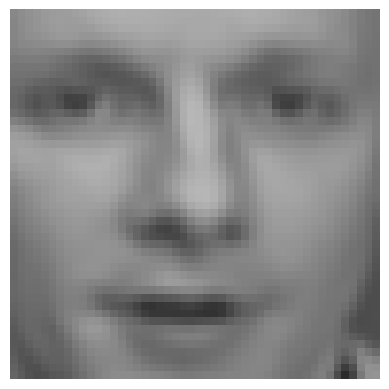

1


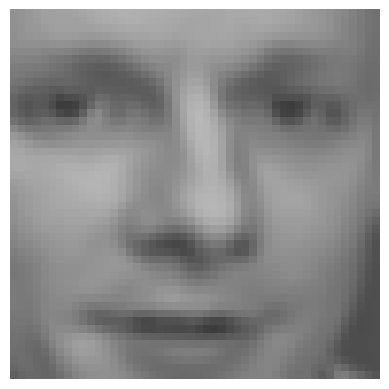

1


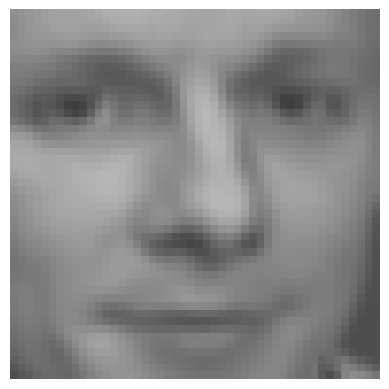

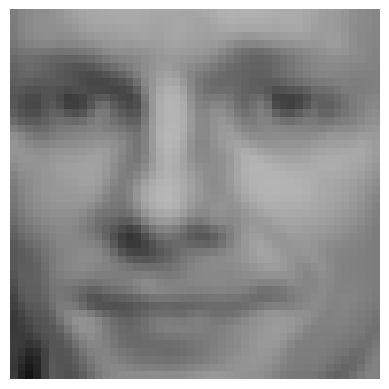

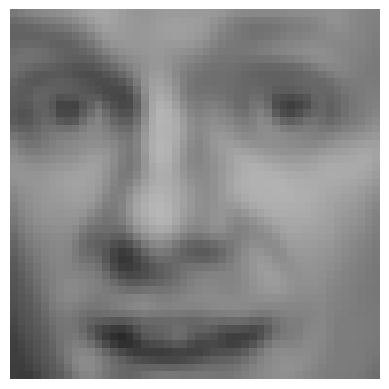

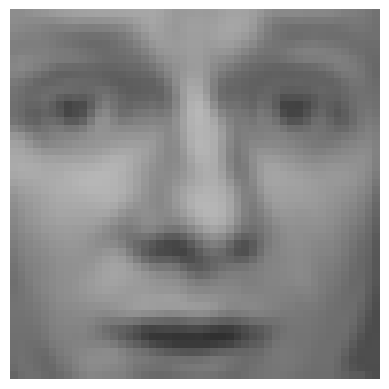

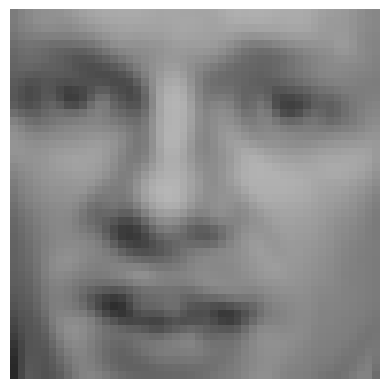

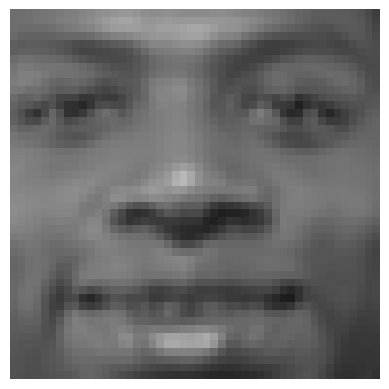

1


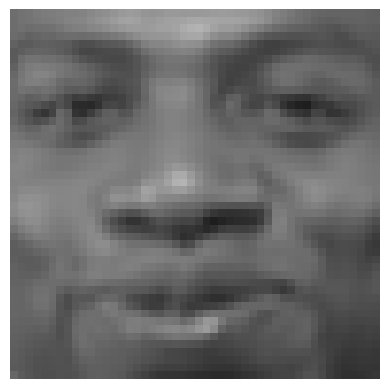

1


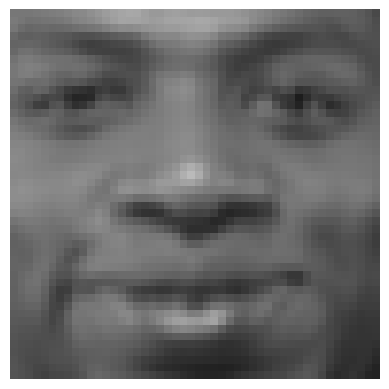

1


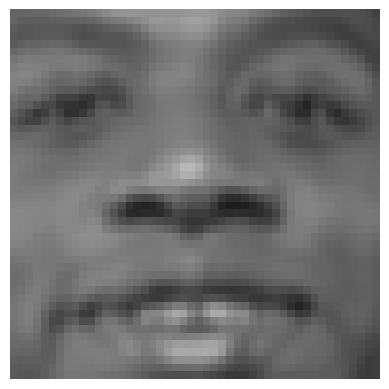

1


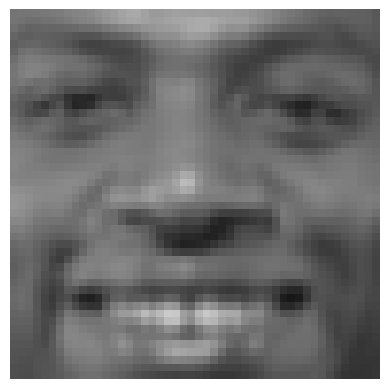

1


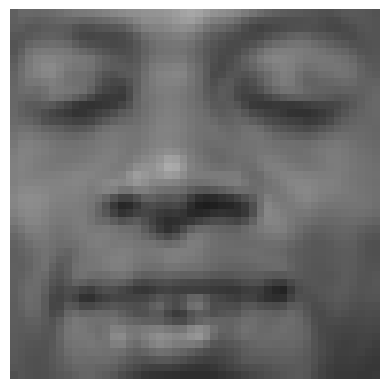

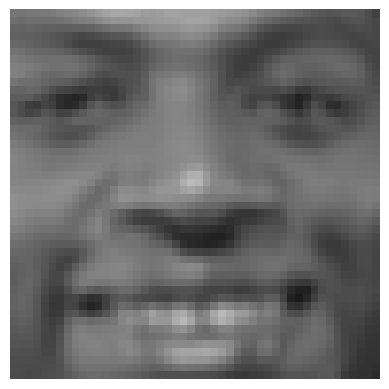

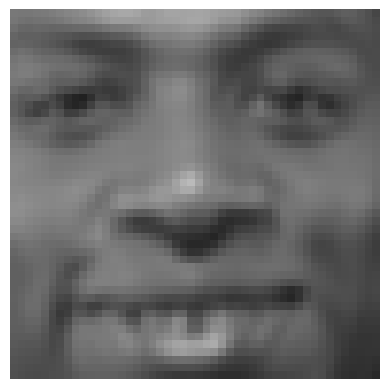

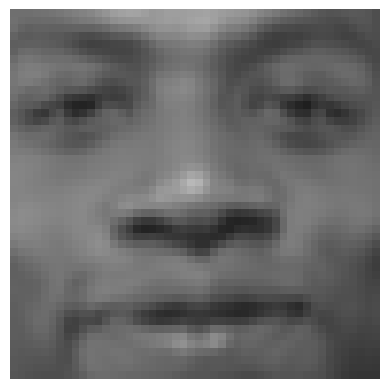

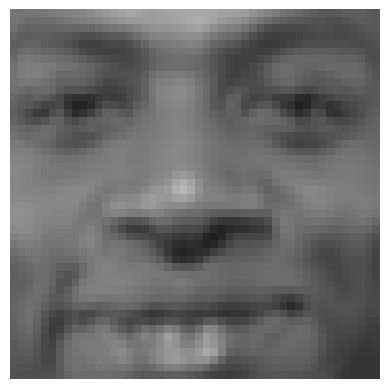

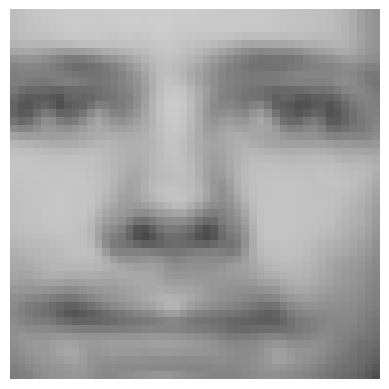

1


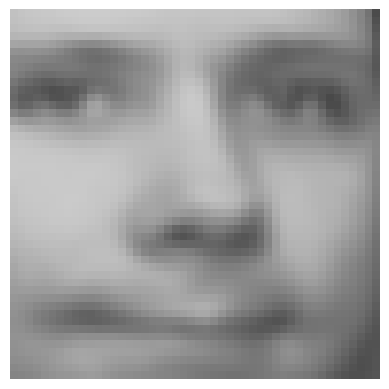

1


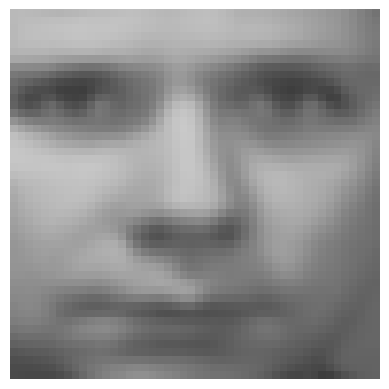

1


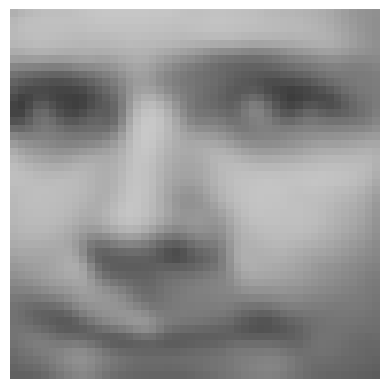

1


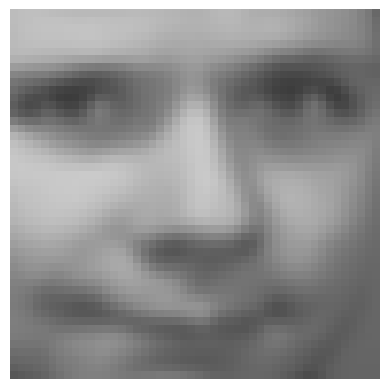

1


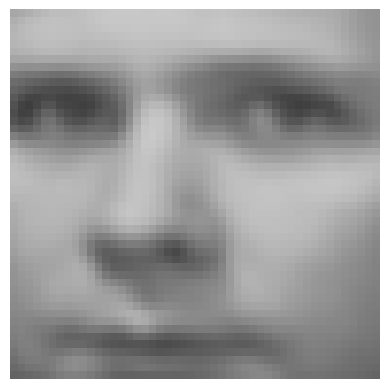

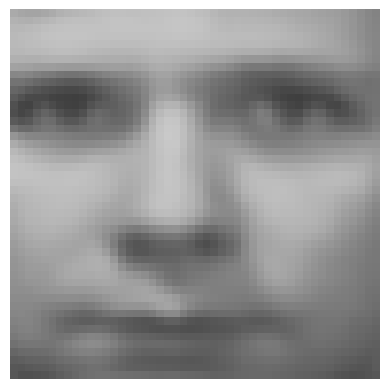

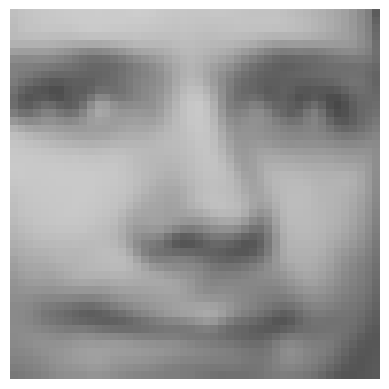

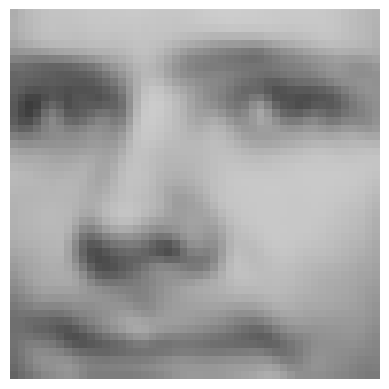

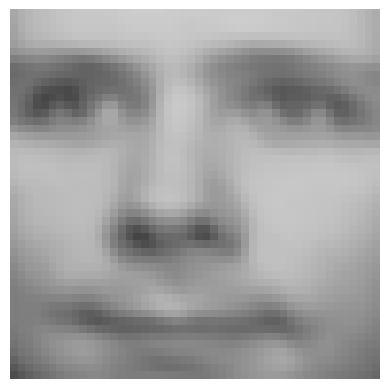

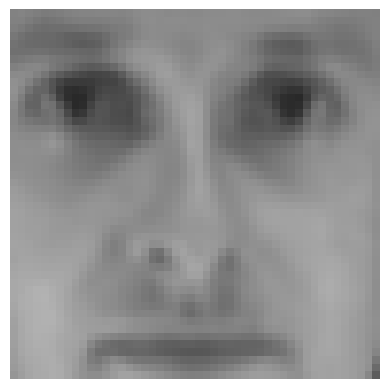

1


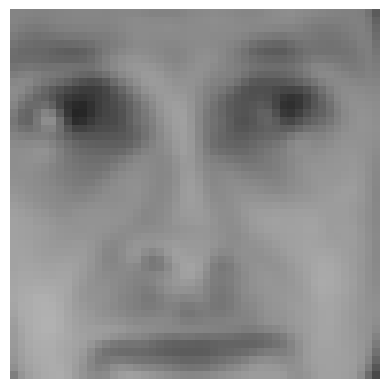

1


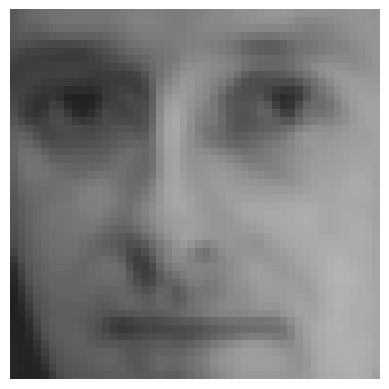

1


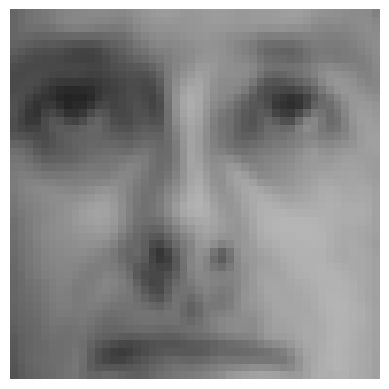

1


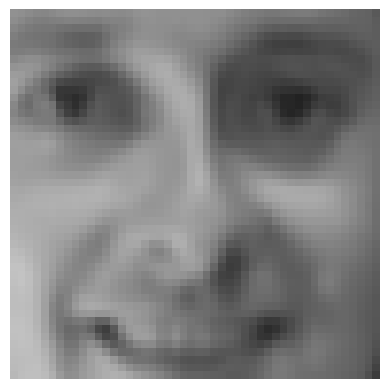

1


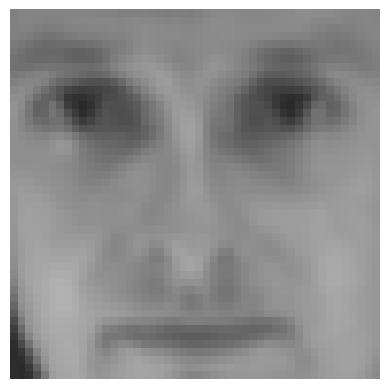

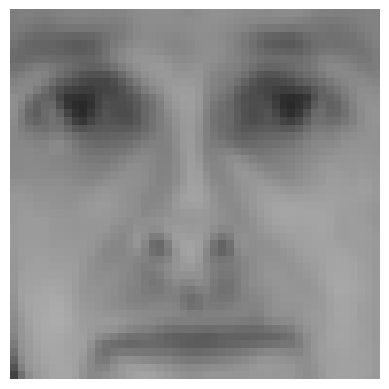

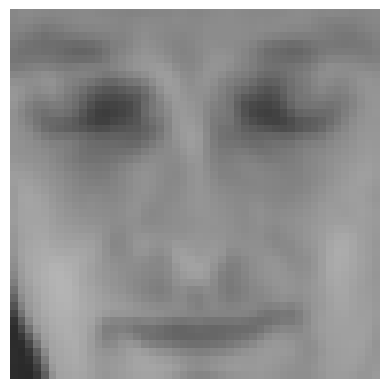

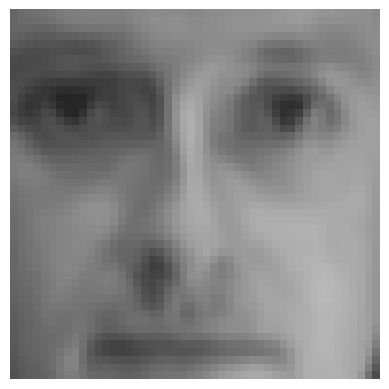

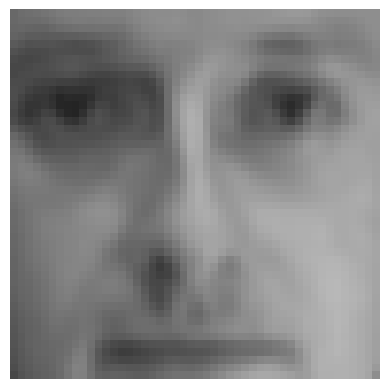

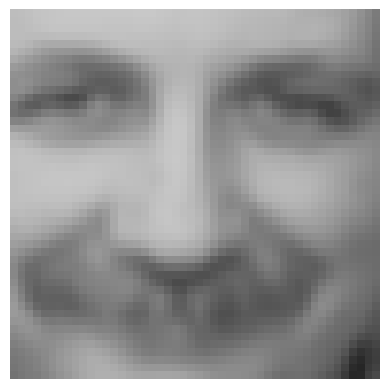

1


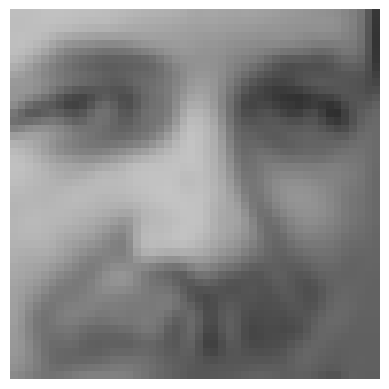

1


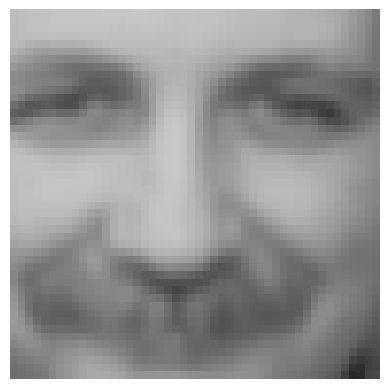

1


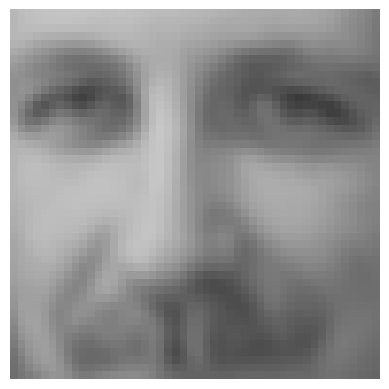

1


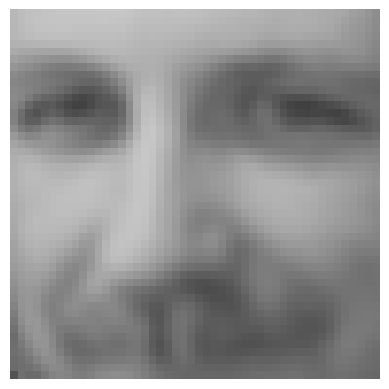

1


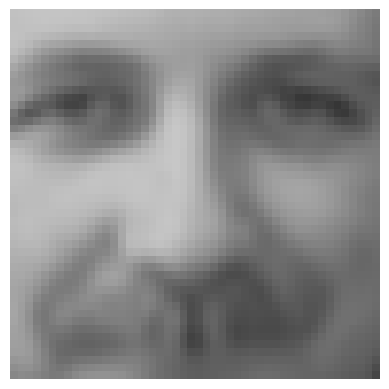

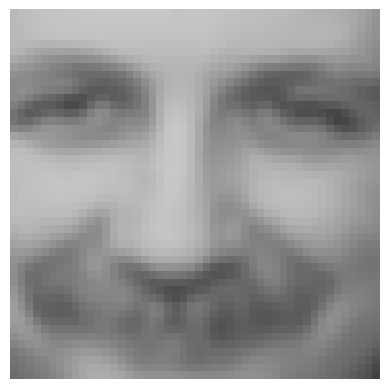

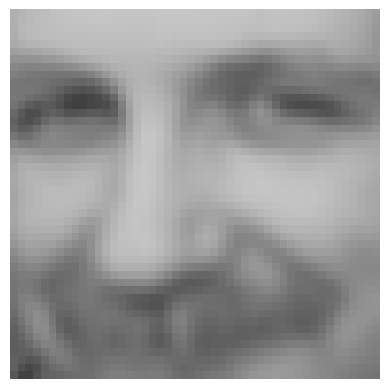

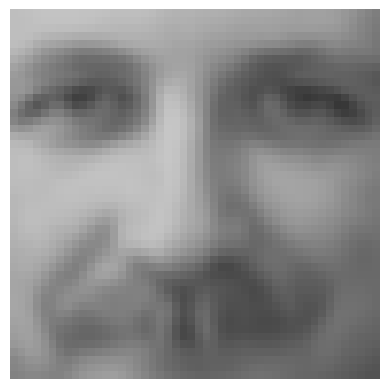

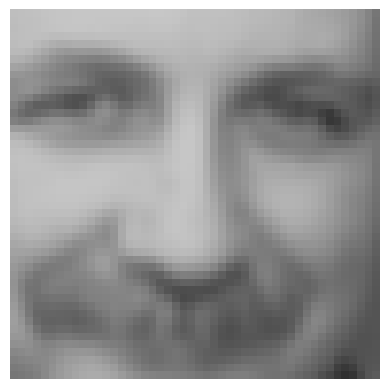

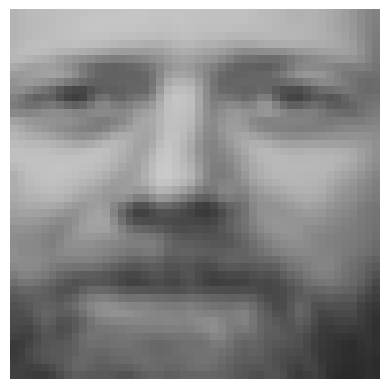

1


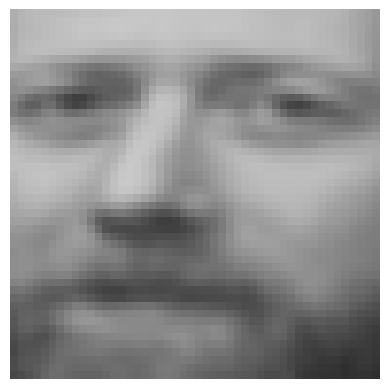

1


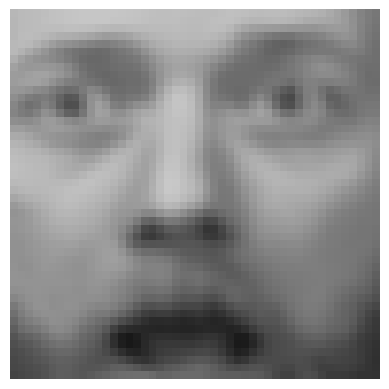

1


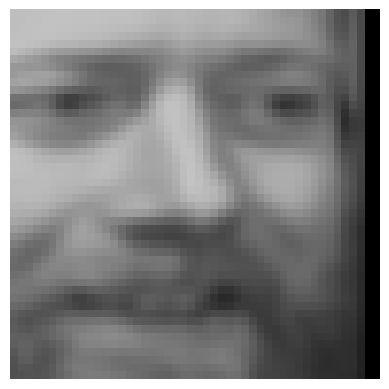

1


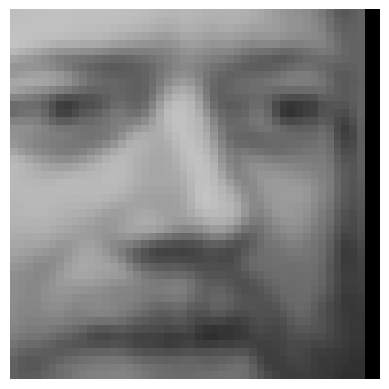

1


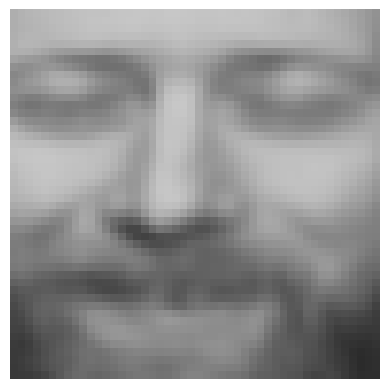

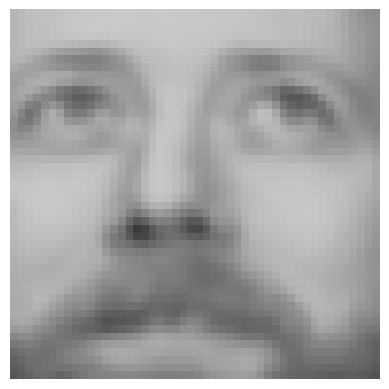

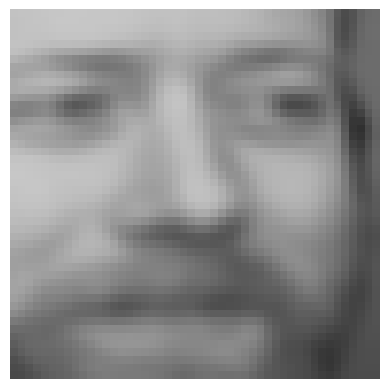

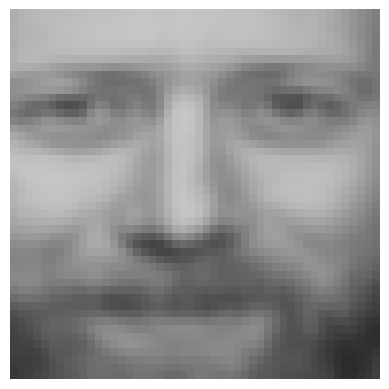

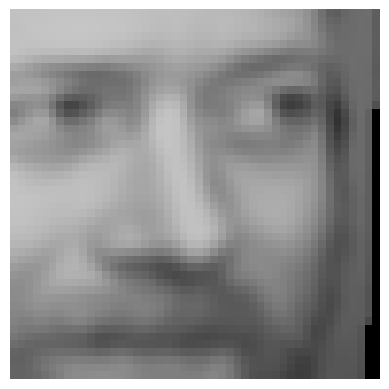

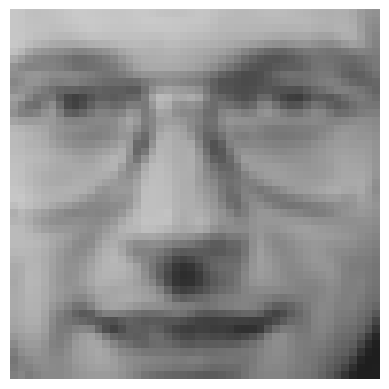

1


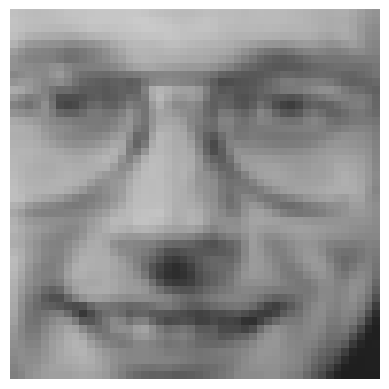

1


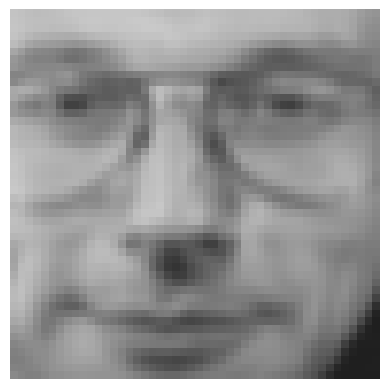

1


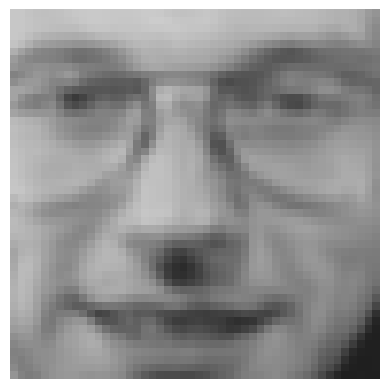

1


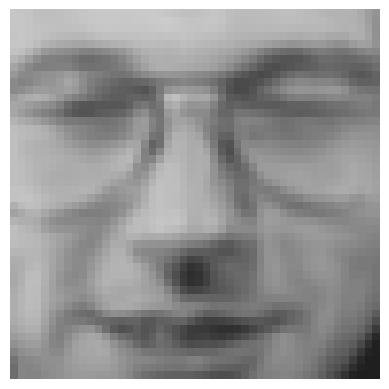

1


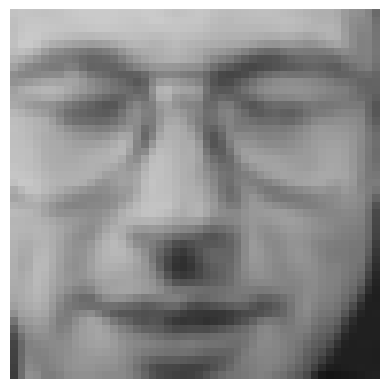

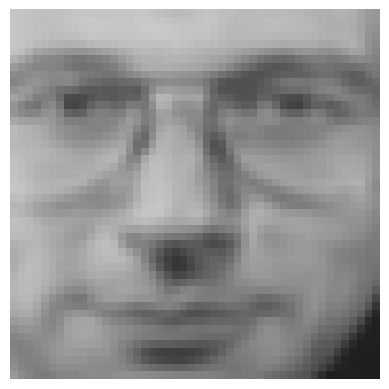

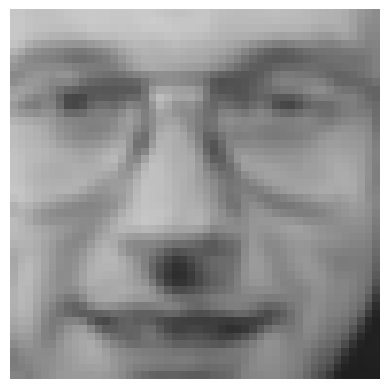

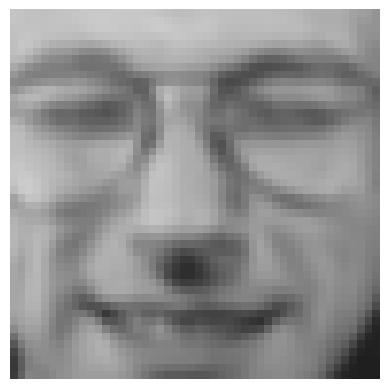

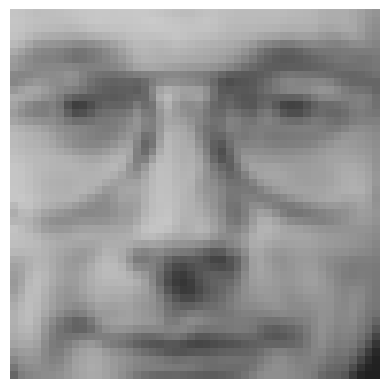

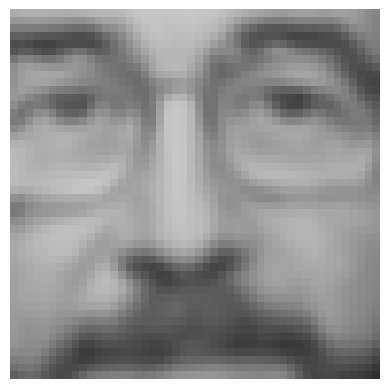

1


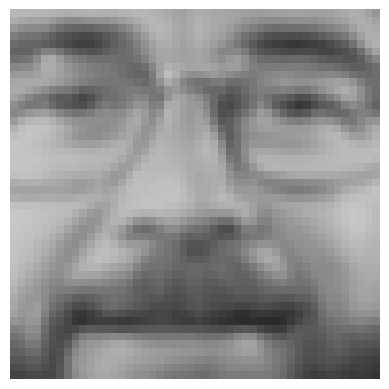

1


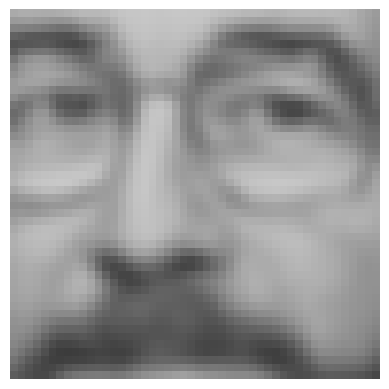

1


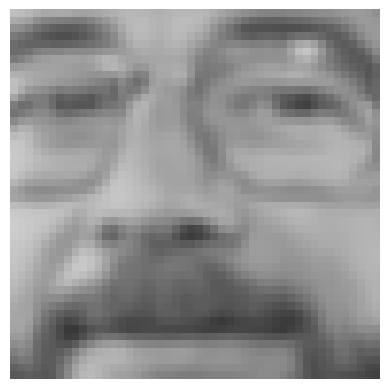

1


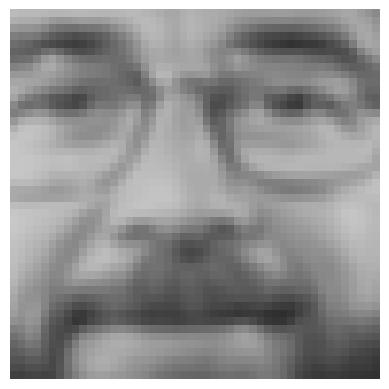

1


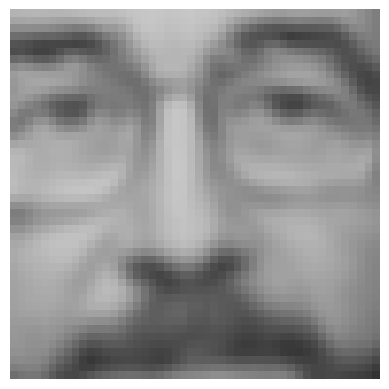

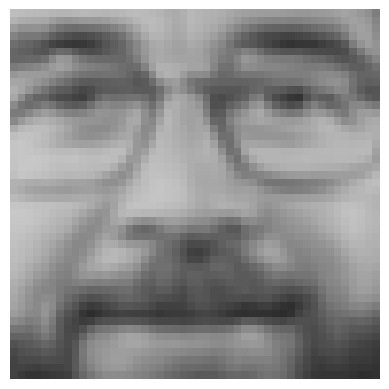

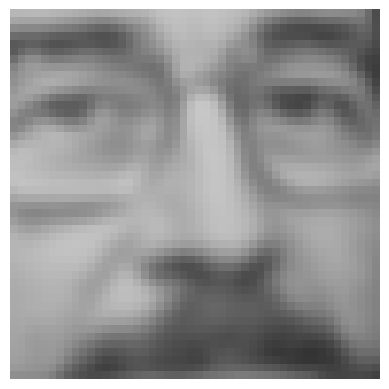

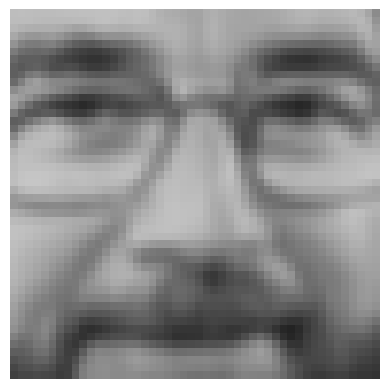

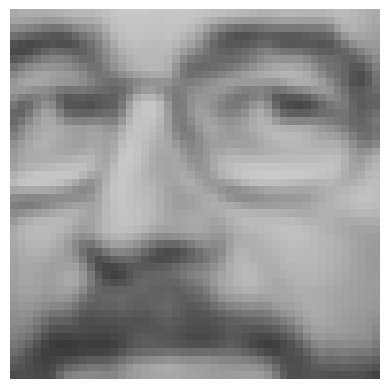

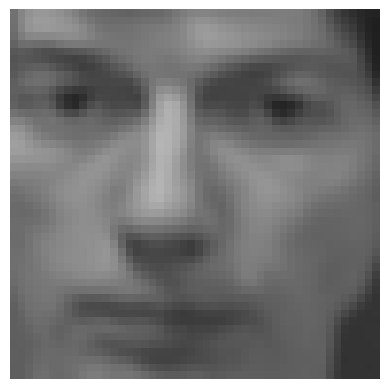

1


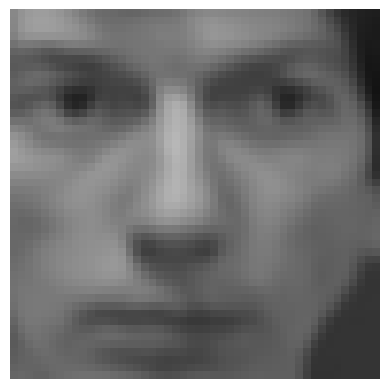

1


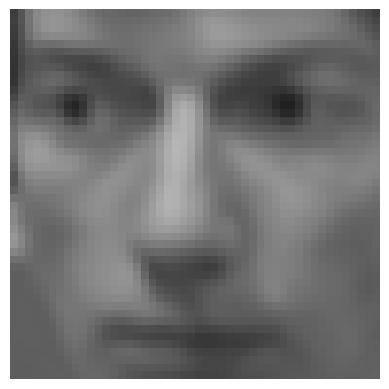

1


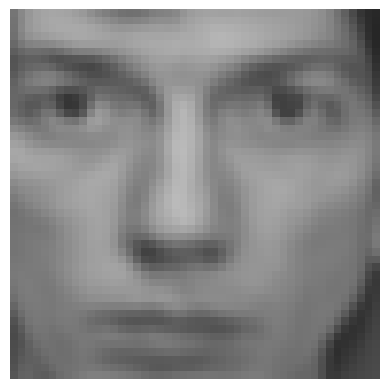

1


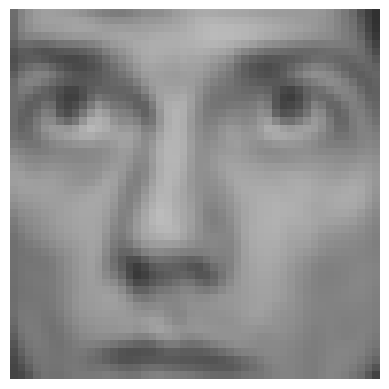

1


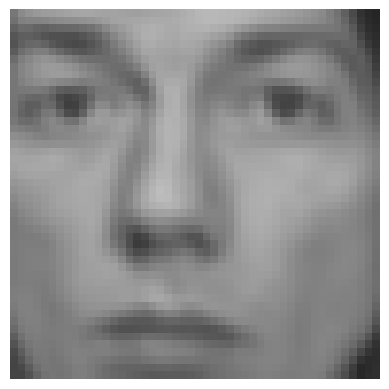

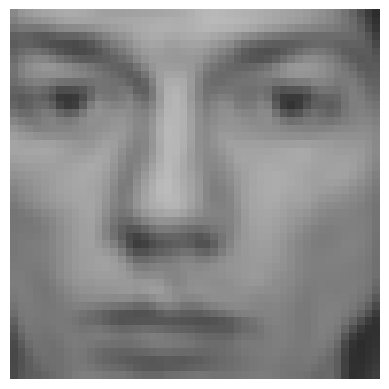

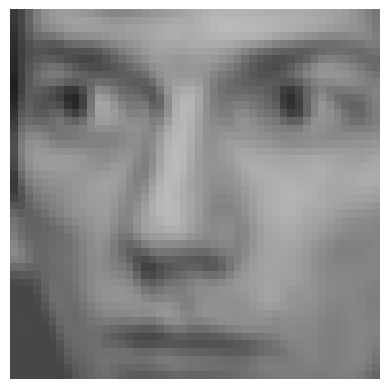

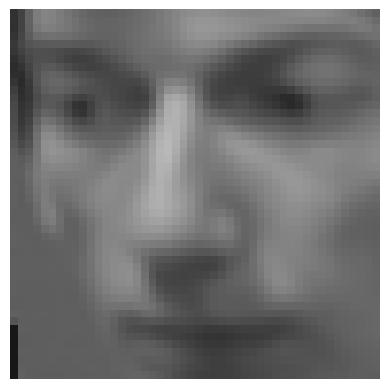

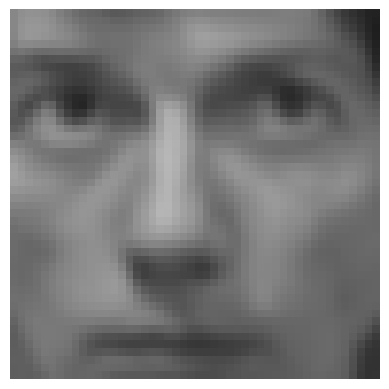

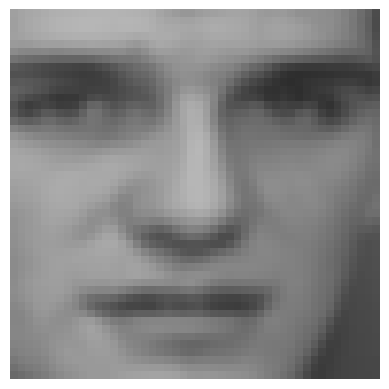

1


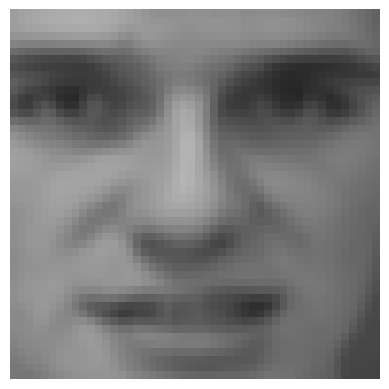

1


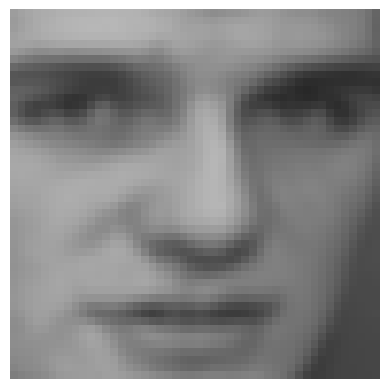

1


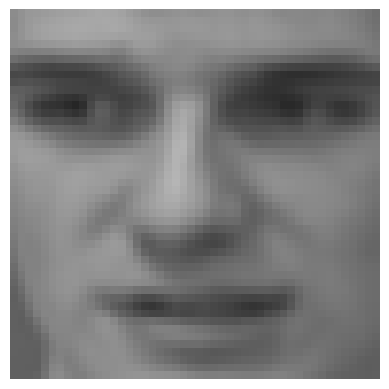

1


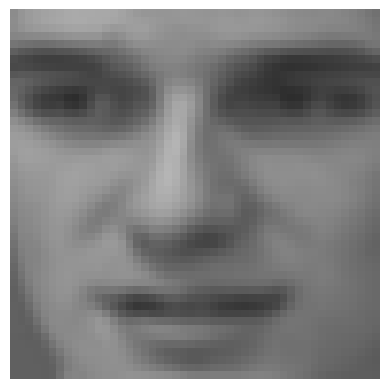

1


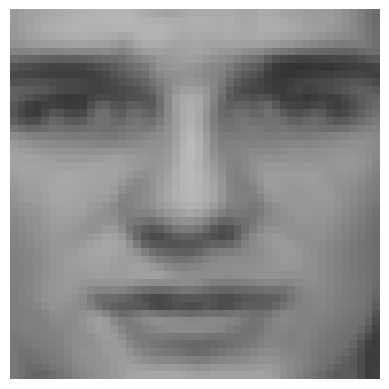

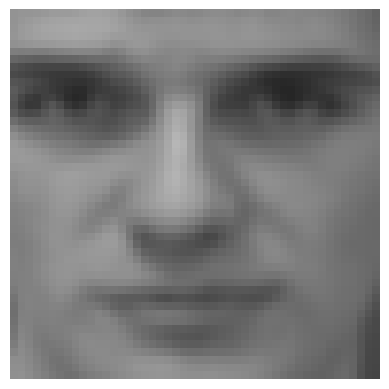

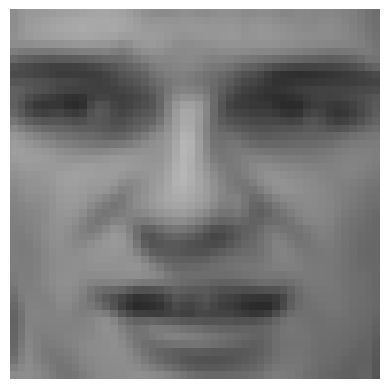

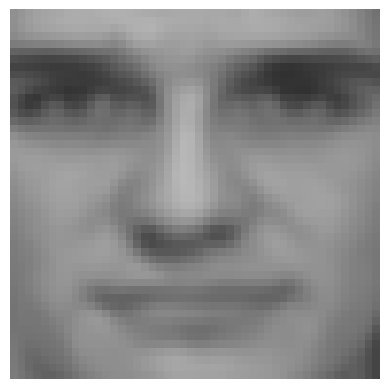

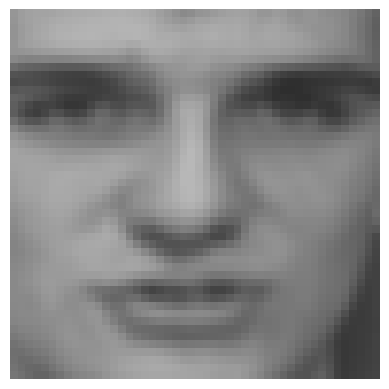

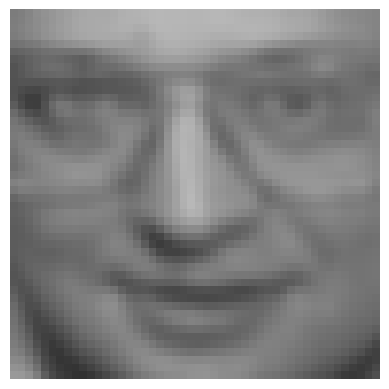

1


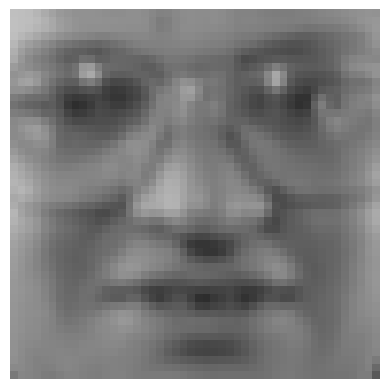

1


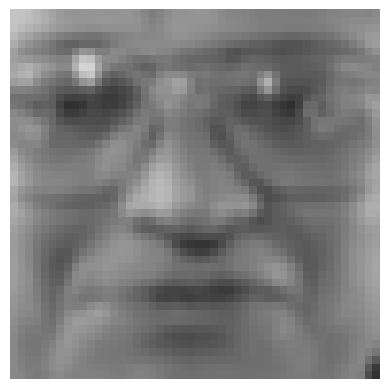

1


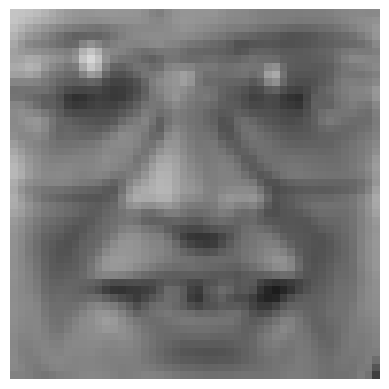

1


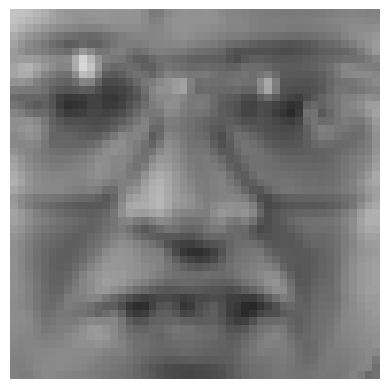

1


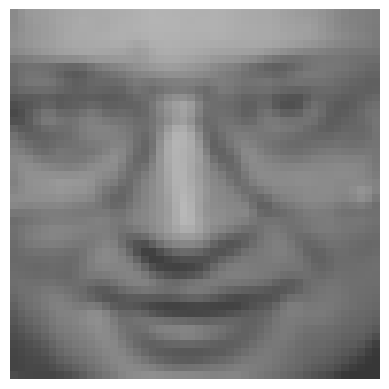

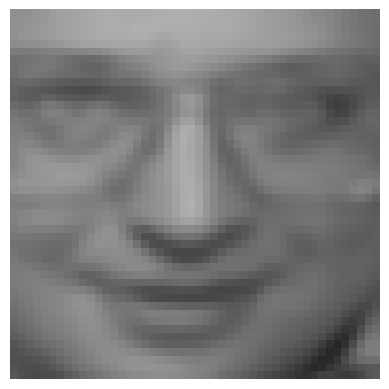

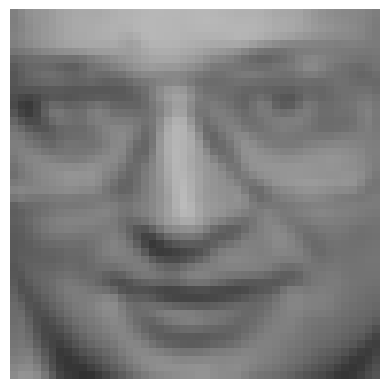

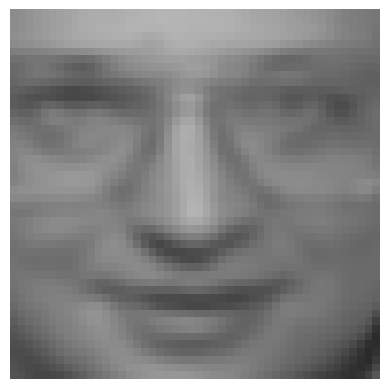

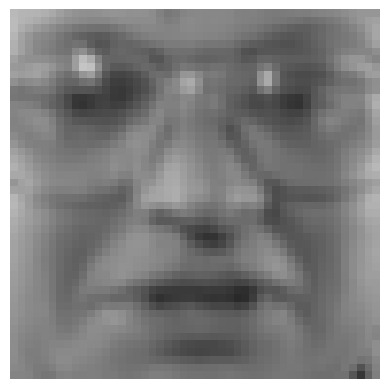

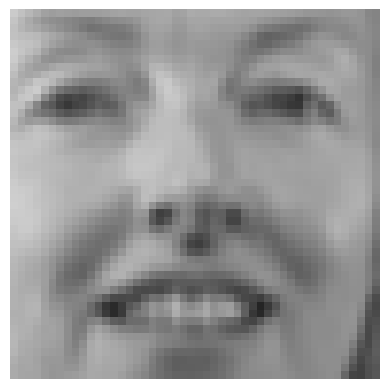

1


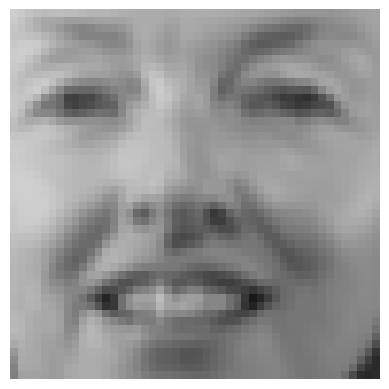

1


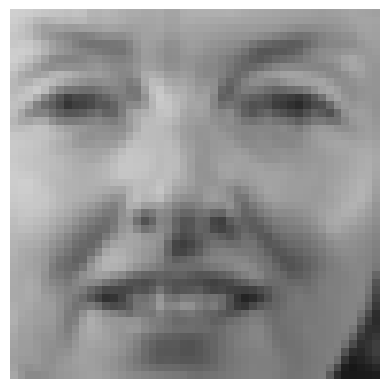

1


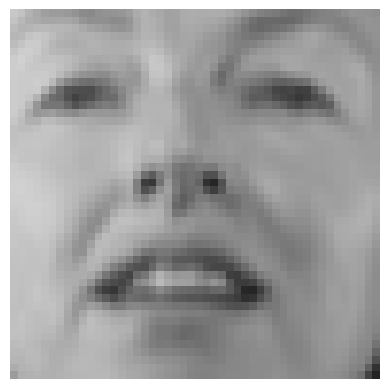

1


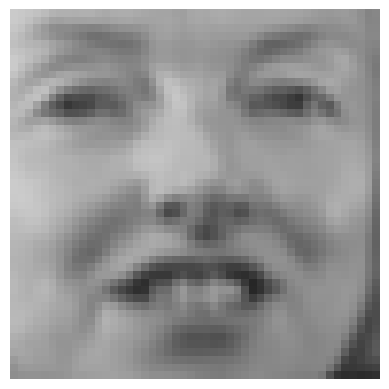

1


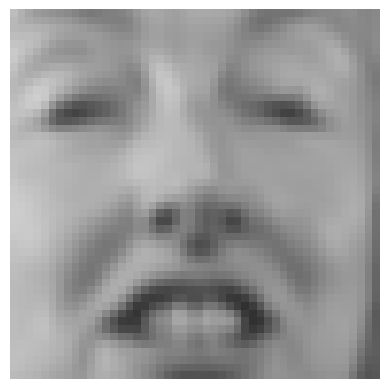

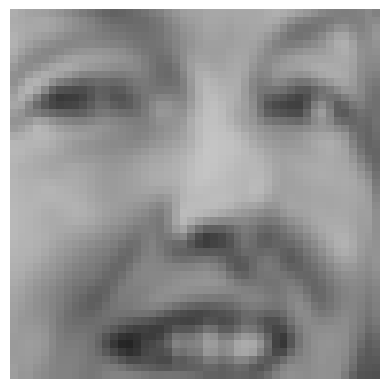

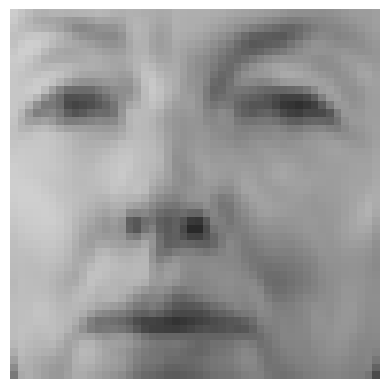

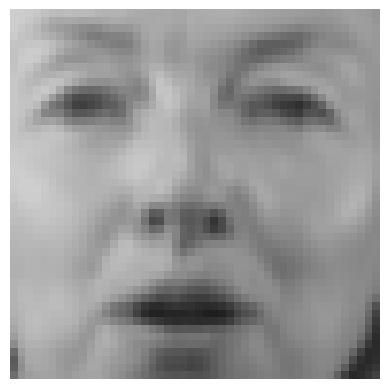

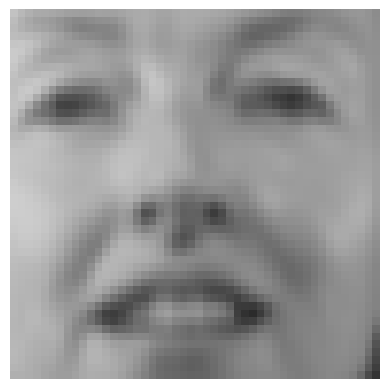

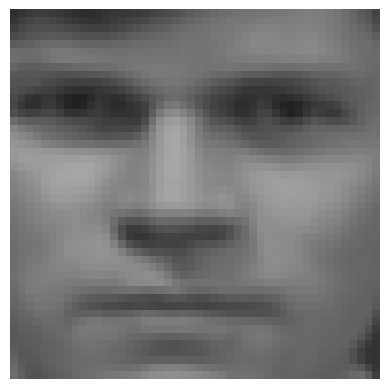

1


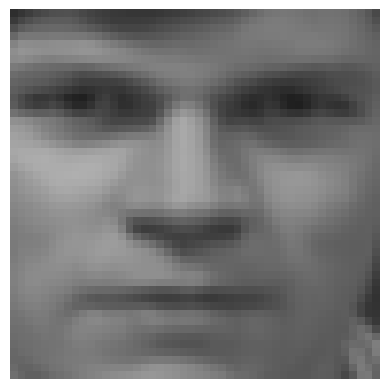

1


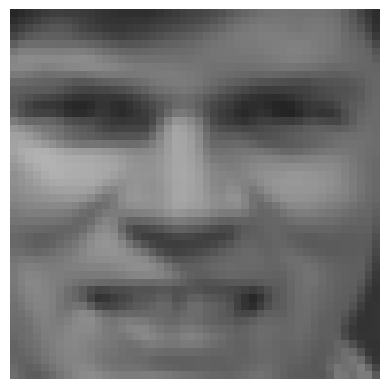

1


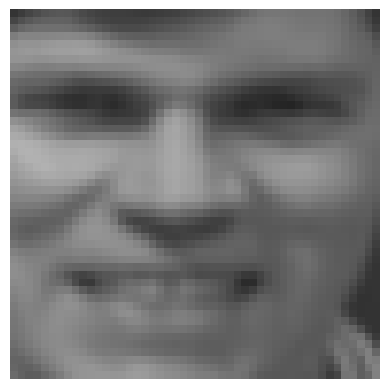

1


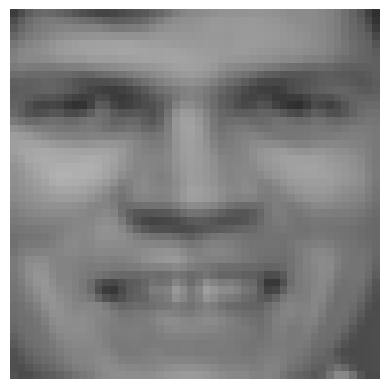

1


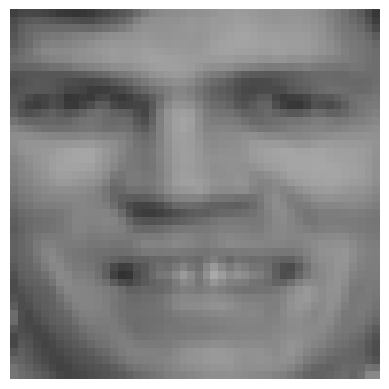

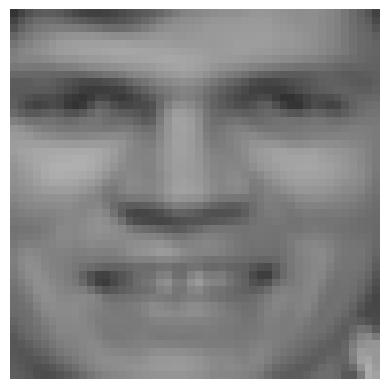

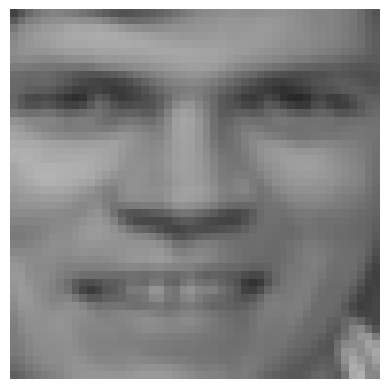

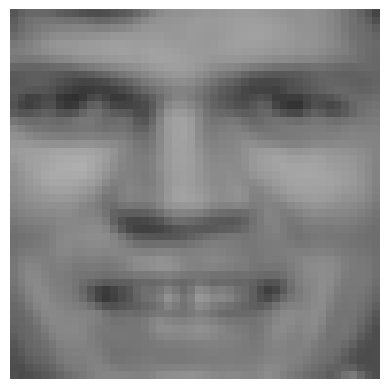

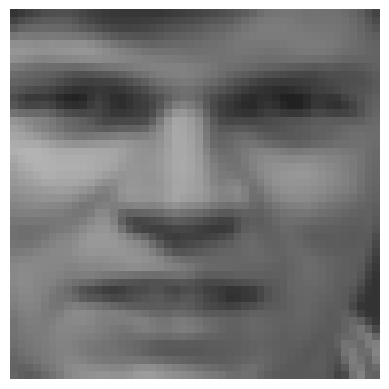

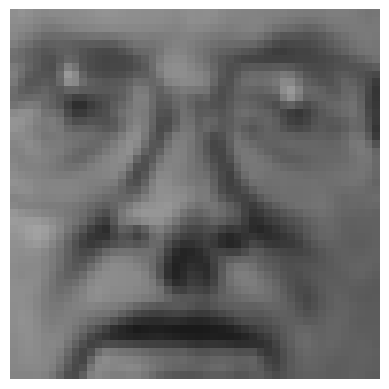

1


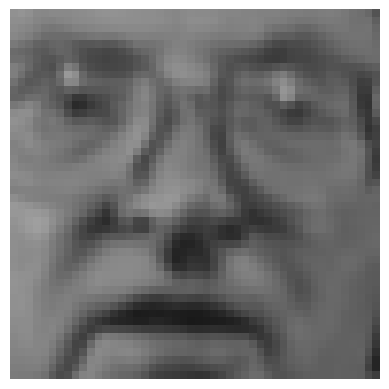

1


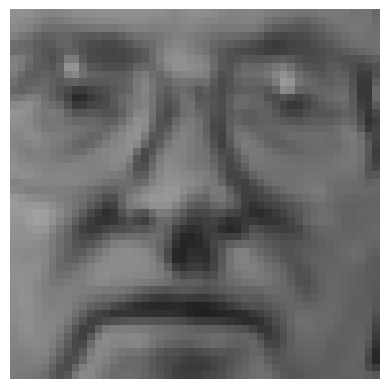

1


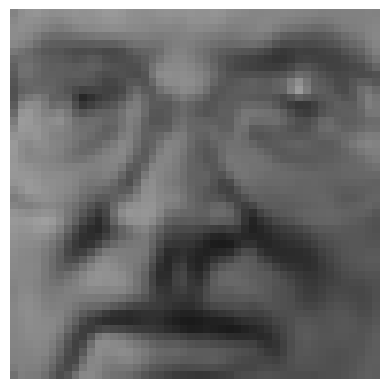

1


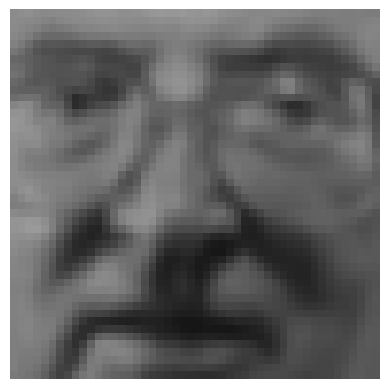

1


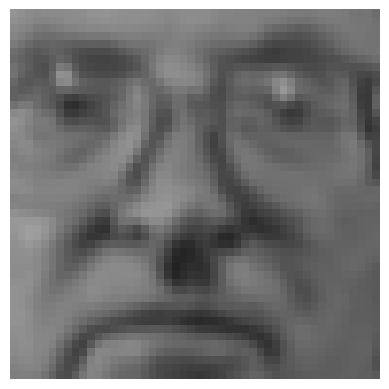

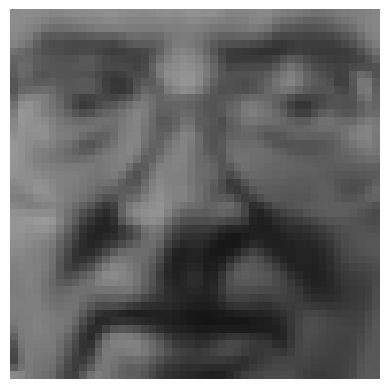

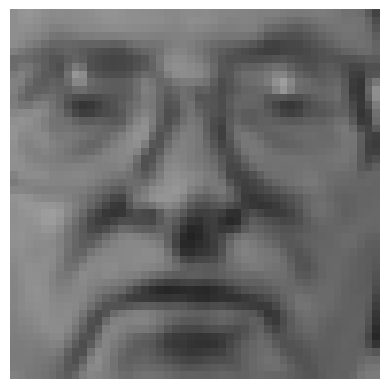

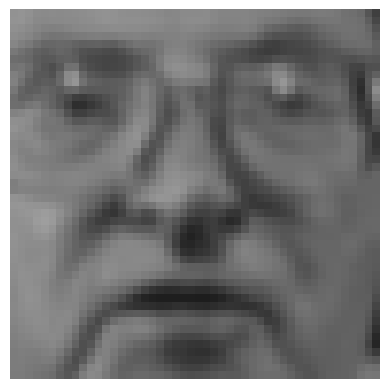

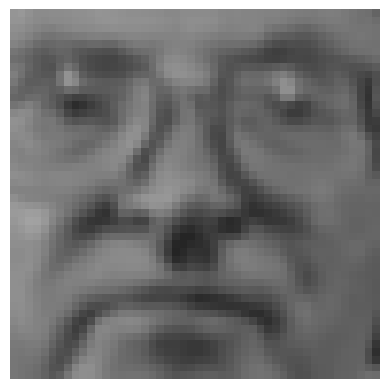

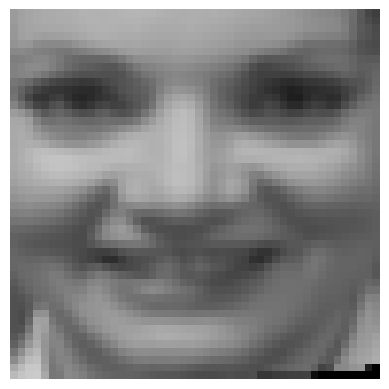

1


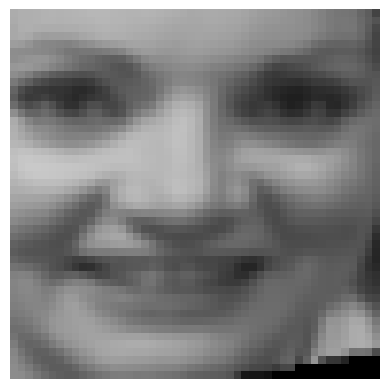

1


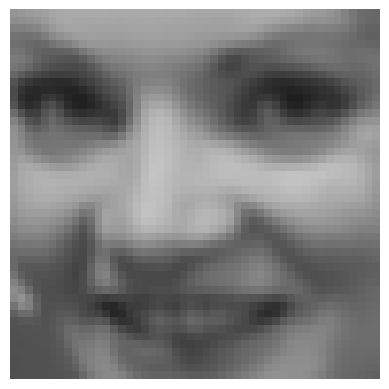

1


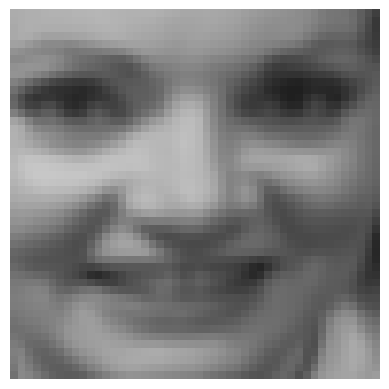

1


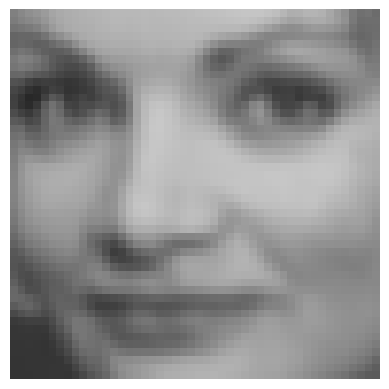

1


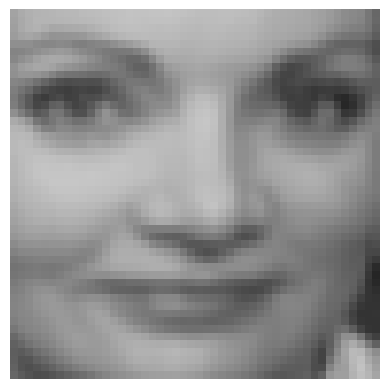

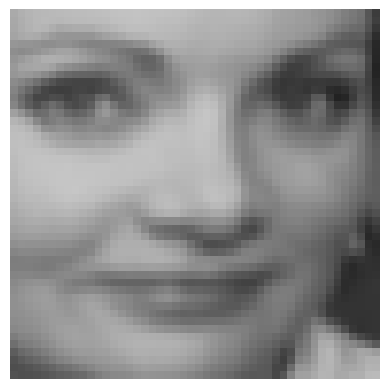

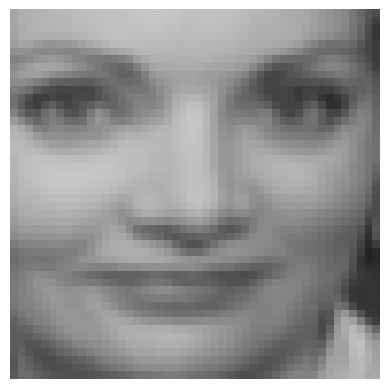

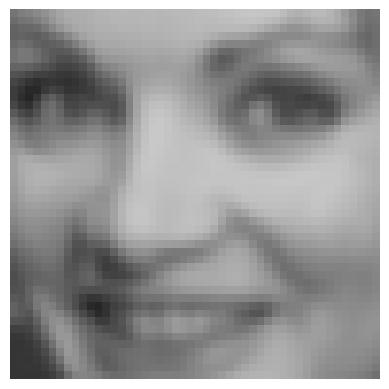

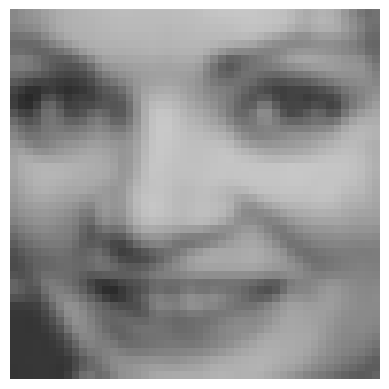

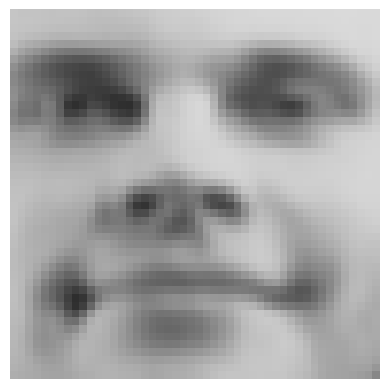

1


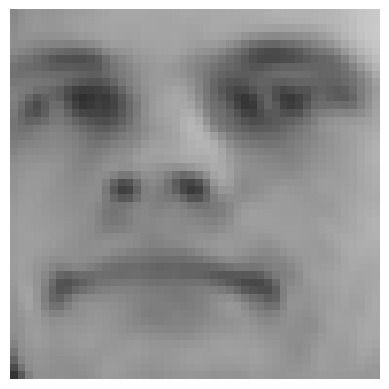

1


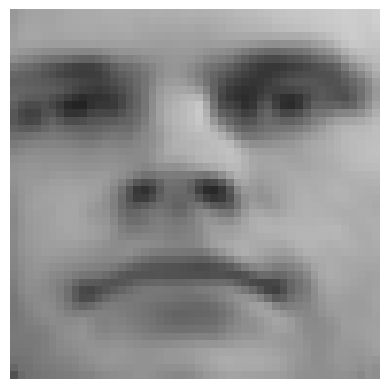

1


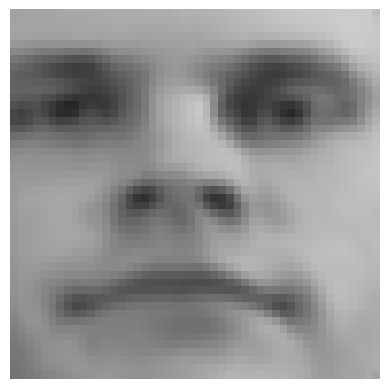

1


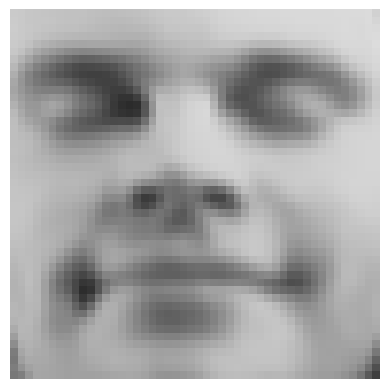

1


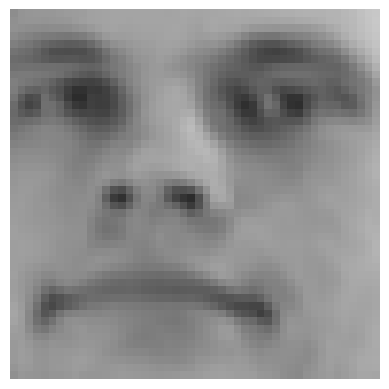

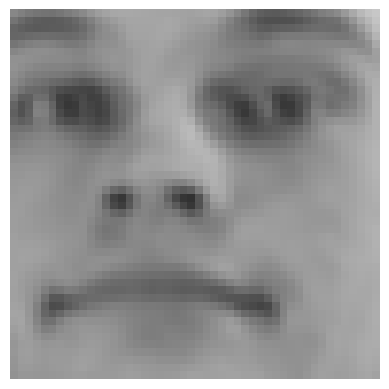

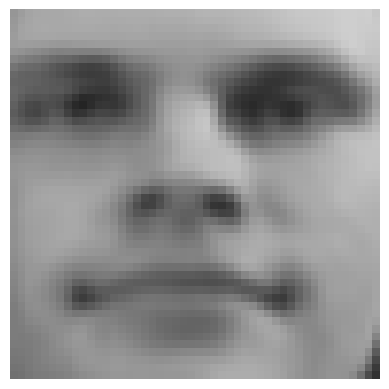

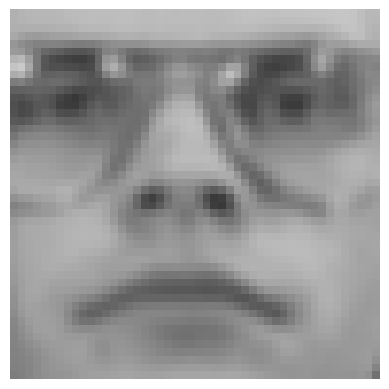

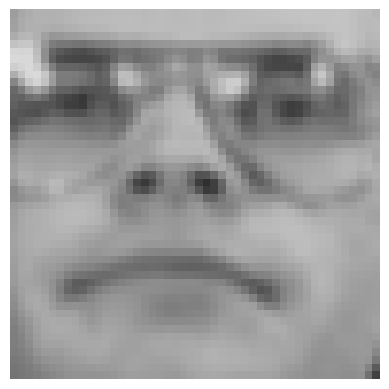

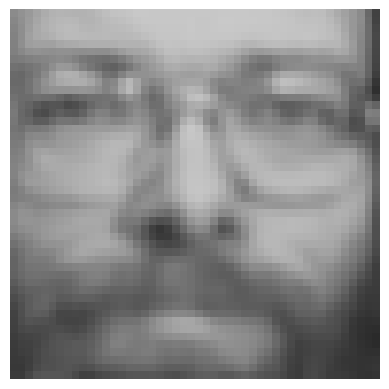

1


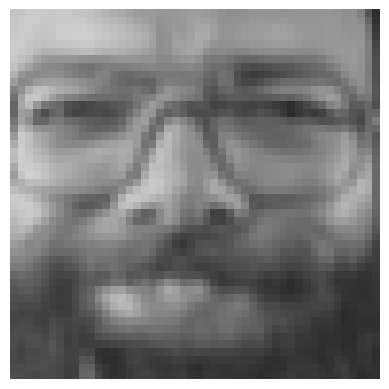

1


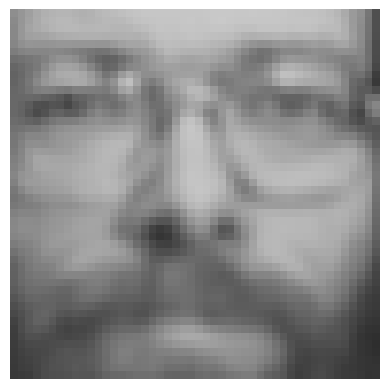

1


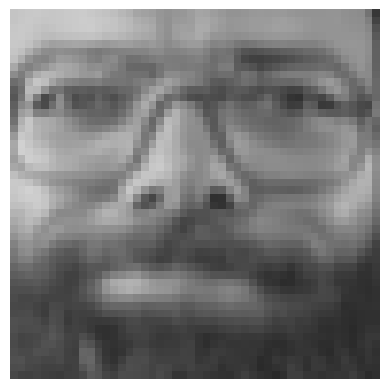

1


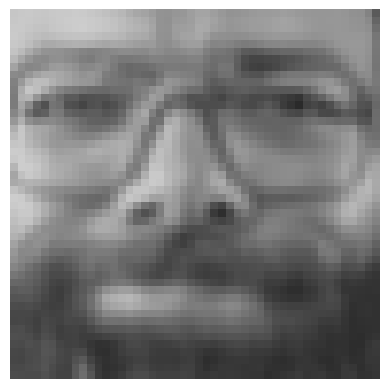

1


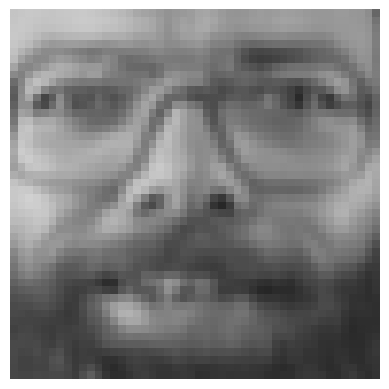

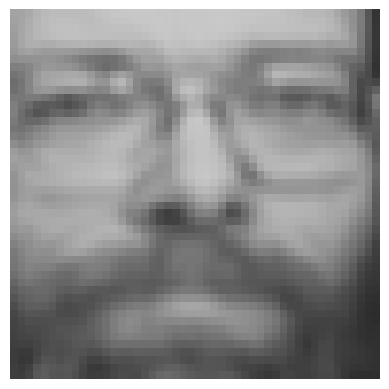

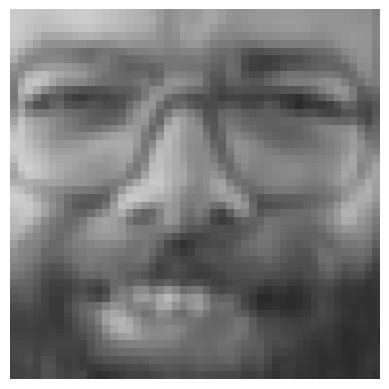

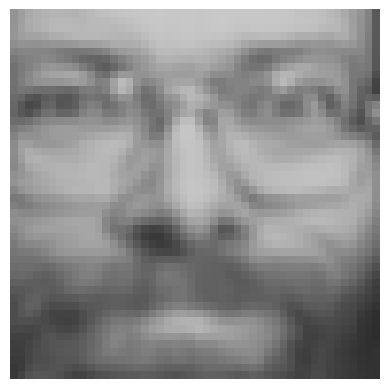

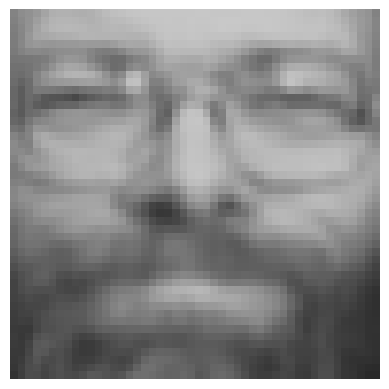

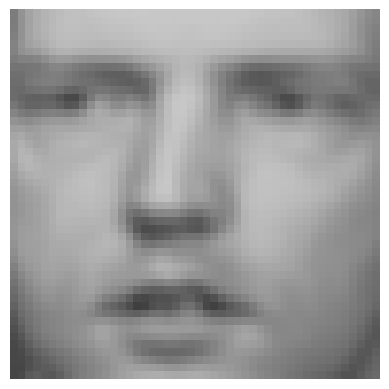

1


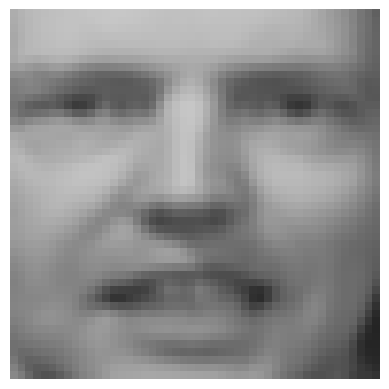

1


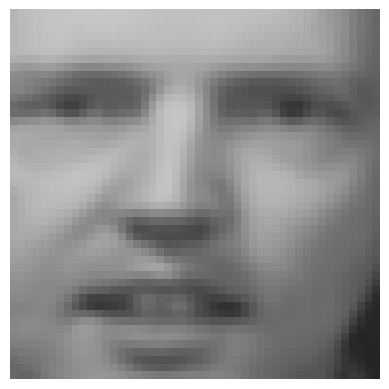

1


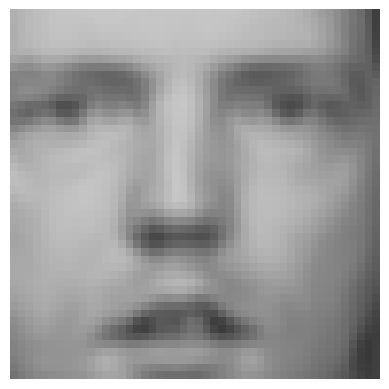

1


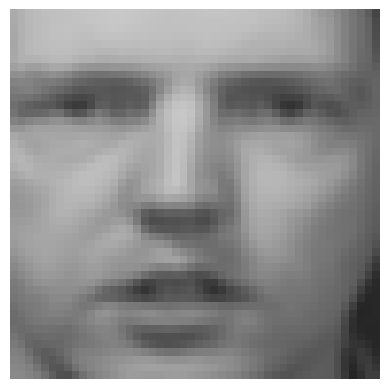

1


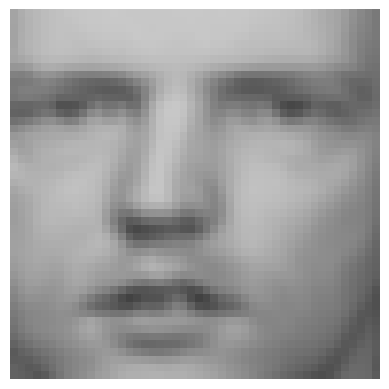

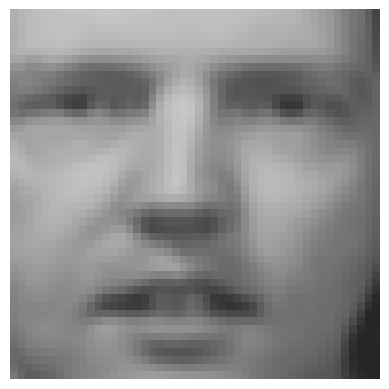

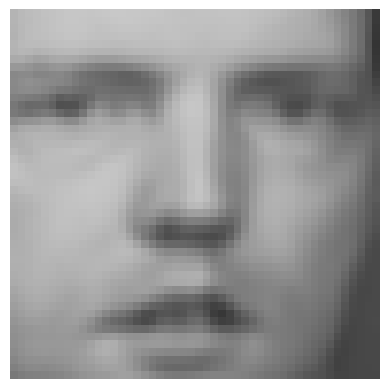

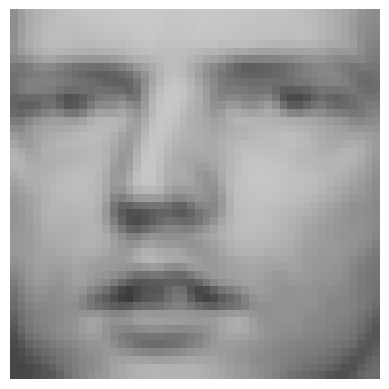

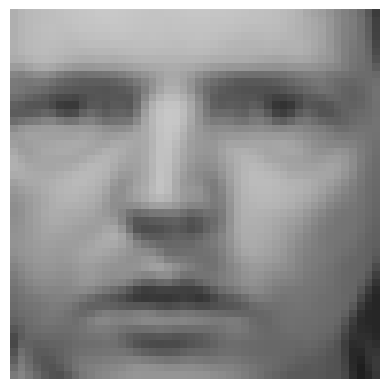

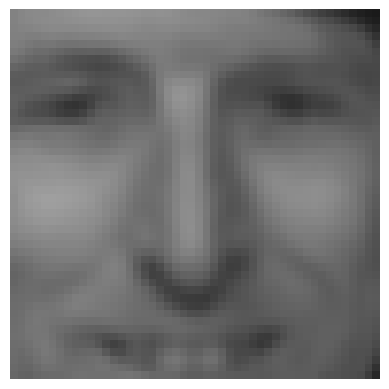

1


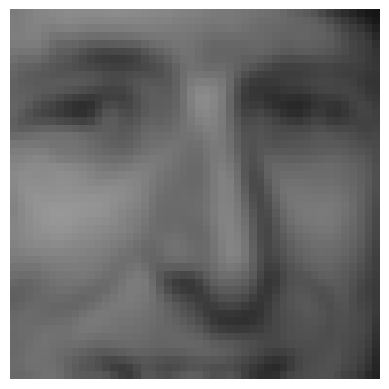

1


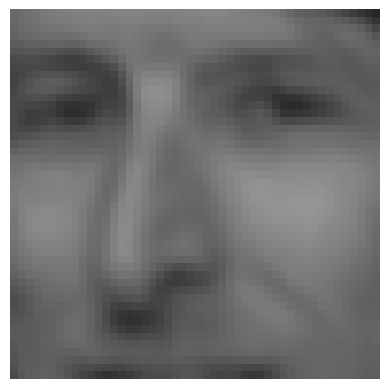

1


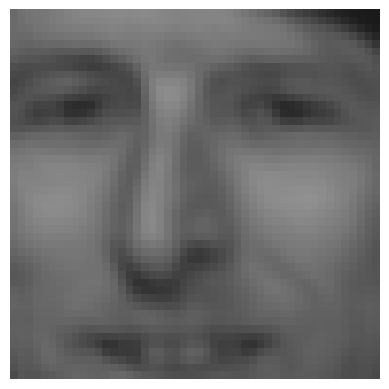

1


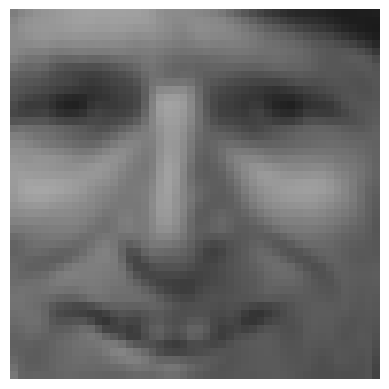

1


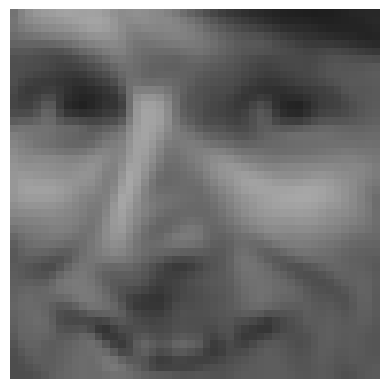

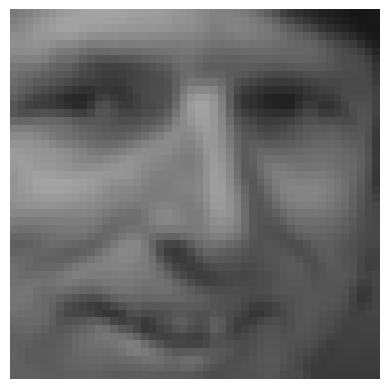

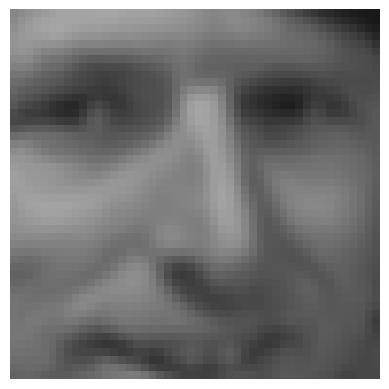

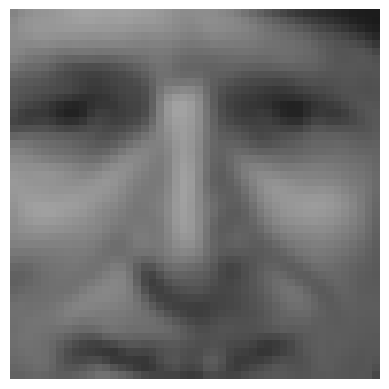

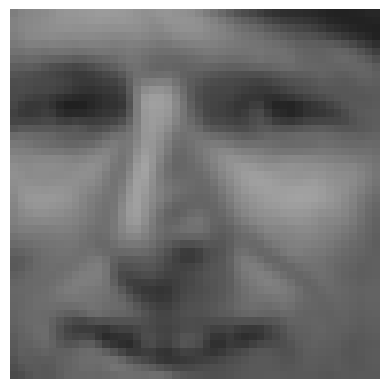

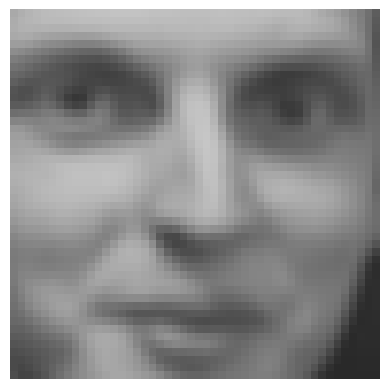

1


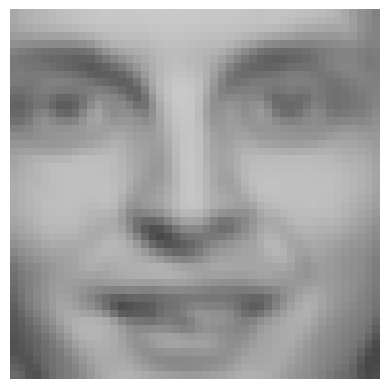

1


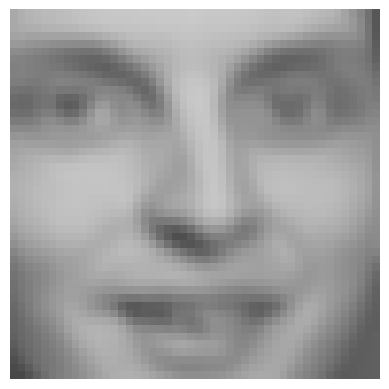

1


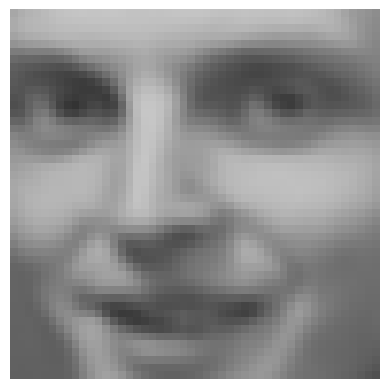

1


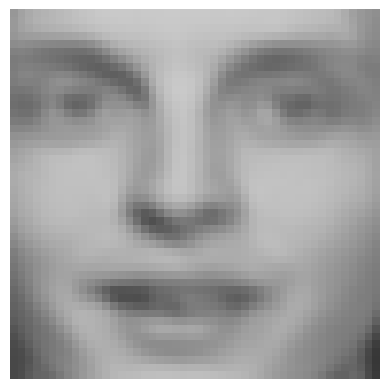

1


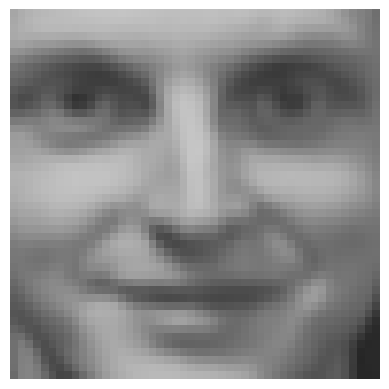

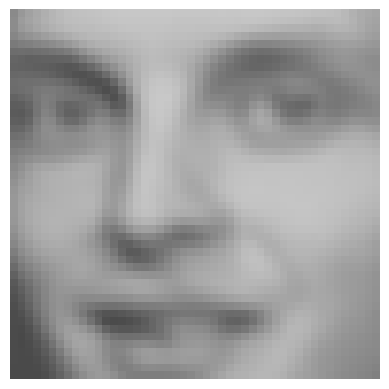

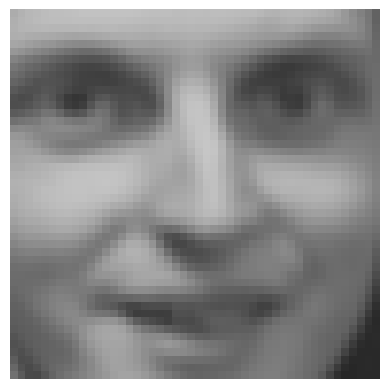

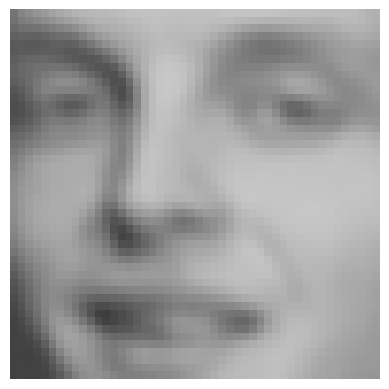

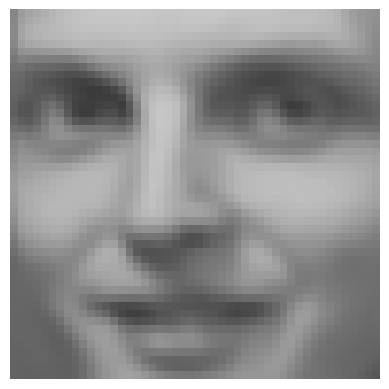

In [26]:
import os
import cv2
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the dataset directory
dataset_dir = "FacesDataset1.zip"

# Extract the contents of the zip file
with zipfile.ZipFile(dataset_dir, 'r') as zip_ref:
    zip_ref.extractall("extracted")

# Get the list of person folders (s1, s2, ..., s40)
person_folders = ['s' + str(i) for i in range(1, 41)]
# Initialize the training and testing data
X_train = []
X_test = []
y_train = []
y_test = []
# Ensure the person folders exist
for person_folder_name in os.listdir('/content/extracted/ORL'):
    person_folder_path = os.path.join('/content/extracted/ORL', person_folder_name)
        # Read the image using OpenCV
    if not os.path.exists(person_folder_path):
        os.makedirs(person_folder_path)
    #print(person_folder_path)

# Iterate through the person folders
for i, person_folder in enumerate(person_folders):
    # Get the full path of the person folder
    person_folder_path = os.path.join('/content/extracted/ORL', person_folder)
    #print(person_folder_path)
    # Get the list of image files in the folder
    image_files = [str(i) for i in range(1, 11) ]

    # Iterate through the image files
    for j, image_file in enumerate(image_files):
      # Get the full path of the image file
       image_file_path = os.path.join(person_folder_path, image_file)
       #print(image_file_path)
        # Read the image using OpenCV
       image = cv2.imread(image_file_path +'.bmp')
       plt.imshow(image)
       plt.axis('off')  # Turn off axis numbers
       plt.show()        # Add the image to the appropriate train or test list
       if j < 5 and image is not None:
        X_train.append(image)
        print(1)
        #plt.imshow(image)
        #plt.axis('off')  # Turn off axis numbers
        #plt.show()
        y_train.append(i)
       else:
        X_test.append(image)
        y_test.append(i)


# Convert the lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


`pip install opencv-python`

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [27]:
from sklearn.decomposition import PCA

# Reshape the X_train and X_test data for PCA
n_samples_train, height, width, channels = X_train.shape
X_train_reshaped = X_train.reshape((n_samples_train, height * width * channels))

n_samples_test, _, _, _ = X_test.shape
X_test_reshaped = X_test.reshape((n_samples_test, height * width * channels))

# Perform PCA on the training data
n_components = 50  # Specify the number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_reshaped)

# Reduce the dimensionality of the test data using the same PCA transformation
X_test_pca = pca.transform(X_test_reshaped)

print("PCA applied. Reduced to {} components.".format(n_components))

PCA applied. Reduced to 50 components.


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [29]:
# Train Linear Discriminant Analysis (LDA) classifier on the PCA-transformed data
lda = LDA()
lda.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test_pca)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the LDA classifier on the test set: {:.2f}%".format(accuracy * 100))

Accuracy of the LDA classifier on the test set: 93.00%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [31]:
from sklearn.decomposition import PCA

# Define the range of PCA dimensions to test
pca_dimensions = range(100, 39, -10)

for n_components in pca_dimensions:
    # Perform PCA on the training data
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_reshaped)
    X_test_pca = pca.transform(X_test_reshaped)

    # Train LDA classifier on the PCA-transformed data
    lda = LDA()
    lda.fit(X_train_pca, y_train)

    # Make predictions on the test data
    y_pred = lda.predict(X_test_pca)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy of the LDA classifier with PCA dimension {} : {:.2f}%".format(n_components, accuracy * 100))

Accuracy of the LDA classifier with PCA dimension 100 : 89.00%
Accuracy of the LDA classifier with PCA dimension 90 : 92.00%
Accuracy of the LDA classifier with PCA dimension 80 : 91.50%
Accuracy of the LDA classifier with PCA dimension 70 : 91.00%
Accuracy of the LDA classifier with PCA dimension 60 : 90.50%
Accuracy of the LDA classifier with PCA dimension 50 : 91.50%
Accuracy of the LDA classifier with PCA dimension 40 : 94.00%
